# Project Plan

## The Data

The [Adventure Works 2022](https://www.kaggle.com/datasets/algorismus/adventure-works-in-excel-tables/data) dataset was chosen for this sample project because it provides sports equipment sales and business information. This dataset is often used to demo well known Microsoft products such as PowerBI and Azure Synapse Analytics.  

### Data Quality

The 7 csv files under analysis include quality data and are of appropriate size having in mind the purpose and objectives of this project. At fist, the Sales dataset looks particularly interesting given the amount of records. However, some discrepancies were found, for example, when cross-checking sales records with their corresponding product details. Overall, the datasets also lack external data, such as economic indicators, which could provide a richer context. Salespeople's targets, as given, might not account for current market conditions. Moreover, the absence of detailed customer information limits deeper, customer-centric analysis.  
Lastly, the dataset's categorical nature, especially for attributes like colors and aggregated regions, demands careful handling, particularly in machine learning contexts.    
  
### Dataset Details

Product 
This dataset provides general information about products sold, where each product is identified by a unique ProductKey. The data offers insights into the product's category and subcategory. There is additional information on the product's cost.

Region  
The Region dataset includes sales information to broader regions and countries. Every sales territory is denoted by a unique SalesTerritoryKey and is associated with a specific Region (e.g., Northwest, Northeast).

Reseller  
Resellers are entities that sell products to end consumers. Each reseller is identified with a ResellerKey. The dataset details the type of business the reseller engages in (Business Type), the name of the reseller (Reseller), and the location of the reseller, split into City, State-Province, and Country-Region.

Sales  
This is a comprehensive dataset detailing individual sales transactions. Each sale is associated with a unique SalesOrderNumber and the date of the order (OrderDate). Sales records link the product sold (ProductKey), the reseller selling the product (ResellerKey), the employee associated with the sale (EmployeeKey), and the sales territory (SalesTerritoryKey). The dataset also provides quantities sold (Quantity), the unit price (Unit Price), total sales value (Sales), and the cost associated with that sale (Cost).

Salesperson  
This dataset contains information about the salespeople associated with the transactions. Each salesperson has a unique identifier (EmployeeKey), an EmployeeID, and a name (Salesperson). The dataset also provides their title (Title) and their universal principal name (UPN), which looks like an email address and can be used for communications.

SalespersonRegion  
This is a linking dataset that associates salespeople with specific sales territories. It uses the EmployeeKey to identify salespeople and the SalesTerritoryKey to denote the sales territories they are associated with.

Targets  
This dataset appears to set sales targets for employees. Each row associates an EmployeeID with a sales Target value and a month (TargetMonth) for which that target applies.

Overall, these datasets cover product details, sales transactions and regional sales information, details about resellers, and the salespeople driving the business. They are interconnected through keys, making it possible to derive insightful analytics, such as sales performance, regional sales distribution, product popularity, and salesperson efficiency.


## Project Aim and Objectives  

The project focus is on the analysis of sales operations for a company named "AdventureWorks". 
An integral part of this analysis is to gauge the performance of salespeople, both in terms of their ability to meet set targets and their contributions to overall sales figures. Furthermore, it seeks to understand the details of sales distribution across various regions and resellers. 

In parallel to this, some effort was spent in understanding the company's product portfolio. The aim here was to identify products or categories that stand out in sales, thereby discerning potential sales trends that might be of interest to stakeholders.  
Substantial emphasis on data quality and data consistency was given, by ensuring that the datasets are coherent and free from discrepancies in key relationships. The analysis aims to yield reliable insights.  

By integrating data from multiple sources, the project adopts a holistic approach to sales analysis. For instance, the interplay between sales data and salesperson data provide valuable insights into individual performance metrics.  

Overall, the project aim is to provide comprehensive sales analysis and insights that have the potential to shape business strategies, improve sales operations, and possibly steer product or go-to-market strategies for "AdventureWorks."

### Specific Objective(s)  

* __Objective 1:__ Providing applicable business visualisations and insights
* __Objective 2:__ Create a reusable and easy way to extend and distribute the code

## System Design  

### Architecture  
#### General pipelines


![EDA diagram](doc/diagrams/EDA-diagram.png)

### Processing Modules and Algorithms

The following operations and analyses were performed:

Data Loading and Cleaning:  
Loaded datasets into dataframes.  
Handled missing values in the 'color' column of the product dataset.  
Checked data types and duplicates across datasets.  
Formatted and converted monetary columns to appropriate data types in both the Sales and Targets datasets.  
Converted 'OrderDate' and 'TargetMonth' columns to DateTime.  

Data Consistency Checks:  
Checked for mismatches in keys across various datasets (e.g., EmployeeID, ProductKey, ResellerKey, SalesTerritoryKey).  

Sales Trend Analysis:  
Plotted sales trends over time.  
Calculated the profit for each sale and analyzed which products or regions generated the most profit.  
Checked for large sales transactions with significant losses during specific months.  
Calculated and visualized monthly sales, costs, and profit margins.  
A correlation between Sales Cost and Sales value was made using the RobustScaler (IQR) and using a RandomForestRegressor
Results were compared to a Linear Regression model

Reseller Analysis:  
Identified which resellers contributed the most to sales and visualized the results.  

Product Analysis:  
Grouped sales data by product categories and subcategories in order to determine which ones had the highest sales.  
Created a boxplot to visualize the spread of sales for different standard cost ranges.  

Salesperson Performance Analysis:  
Calculated total sales by salesperson and compared it against their targets.  
Calculated the variance between actual sales and targets.  
Visualized the actual sales against targets for each salesperson.  
Calculated the Pearson correlation coefficient between different attributes.  

# Program Code


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from eda.data_analysis.data_analysis import DataAnalysis


datasets = {
    'Product': 'datasets/adventureworks/Product.csv',
    'Region': 'datasets/adventureworks/Region.csv',
    'Reseller': 'datasets/adventureworks/Reseller.csv',
    'Sales': 'datasets/adventureworks/Sales.csv',
    'Salesperson': 'datasets/adventureworks/Salesperson.csv',
    'SalespersonRegion': 'datasets/adventureworks/SalespersonRegion.csv',
    'Targets': 'datasets/adventureworks/Targets.csv'
}

dataframes = {}
errors = {}

# Load datasets into the dataframe dict
for key, path in datasets.items():
    try:
        # the original .csv files are actually tab-delimited
        dataframes[key] = pd.read_csv(path, delimiter='\t')
    except Exception as e:
        errors[key] = str(e)

if errors:
    print("Errors occurred while loading the following datasets:")
    for key, error_msg in errors.items():
        print(f"{key}: {error_msg}")
else:
    print("All datasets loaded.")

All datasets loaded.


## Analysis

In [105]:
for name, _ in dataframes.items():
    print(f"Dataframe: {name}")
    DataAnalysis(dataframes[name]).initial()

Dataframe: Product
self.df.head(10)
   ProductKey                    Product Standard Cost  Color  Subcategory  \
0         210  HL Road Frame - Black, 58       $868.63  Black  Road Frames   
1         215    Sport-100 Helmet, Black        $12.03  Black      Helmets   
2         216    Sport-100 Helmet, Black        $13.88  Black      Helmets   
3         217    Sport-100 Helmet, Black        $13.09  Black      Helmets   
4         253  LL Road Frame - Black, 58        $176.2  Black  Road Frames   
5         254  LL Road Frame - Black, 58       $170.14  Black  Road Frames   
6         255  LL Road Frame - Black, 58       $204.63  Black  Road Frames   
7         256  LL Road Frame - Black, 60        $176.2  Black  Road Frames   
8         257  LL Road Frame - Black, 60       $170.14  Black  Road Frames   
9         258  LL Road Frame - Black, 60       $204.63  Black  Road Frames   

      Category Background Color Format Font Color Format  
0   Components                 #000000        

### Handling Missing Values  

Check for any missing values in the datasets.

In [106]:
missing_values = {name: df.isna().sum() for name, df in dataframes.items()}
missing_values

{'Product': ProductKey                  0
 Product                     0
 Standard Cost               0
 Color                      56
 Subcategory                 0
 Category                    0
 Background Color Format     0
 Font Color Format           0
 dtype: int64,
 'Region': SalesTerritoryKey    0
 Region               0
 Country              0
 Group                0
 dtype: int64,
 'Reseller': ResellerKey       0
 Business Type     0
 Reseller          0
 City              0
 State-Province    0
 Country-Region    0
 dtype: int64,
 'Sales': SalesOrderNumber     0
 OrderDate            0
 ProductKey           0
 ResellerKey          0
 EmployeeKey          0
 SalesTerritoryKey    0
 Quantity             0
 Unit Price           0
 Sales                0
 Cost                 0
 dtype: int64,
 'Salesperson': EmployeeKey    0
 EmployeeID     0
 Salesperson    0
 Title          0
 UPN            0
 dtype: int64,
 'SalespersonRegion': EmployeeKey          0
 SalesTerritoryKey    0

The Product dataset has 56 missing values in the Color column. This indicates that color information is not available for certain products. All other datasets have no missing values.

In [107]:
# pa stands for Product Analysis
df_product = dataframes['Product']
pa = DataAnalysis(df_product)

In [108]:
# handle missing 'color' column values
pa.check_na_values_percent_col('Color')

Total Color values via df[Color].shape[0]: 397
NaN Color values via df[Color].isna().sum(): 56
Percentage of NaN/None Color values: 14.105793450881613
Cannot dropna for column Color as it has less than 75% missing values.


In [109]:
df_product['Color'].fillna('Unknown', inplace=True)

By keeping the product dataset intact I can ensure that any future analysis involving the "Color" column is unambiguous about the missing values.  

In [110]:
df_product['Standard Cost'] = df_product['Standard Cost'].str.replace('$', '').str.replace(',', '')
df_product['Standard Cost'].head()

0    868.63
1     12.03
2     13.88
3     13.09
4     176.2
Name: Standard Cost, dtype: object

In [111]:
df_product['Standard Cost'] = pd.to_numeric(df_product['Standard Cost'], errors='coerce')
df_product['Standard Cost'].dtype

dtype('float64')

### Data Format Consistency  

Ensure that data types and formats are consistent. Identify any duplicate rows or entries.


In [112]:
# Check data types for each dataset
data_types_check = {name: df.dtypes for name, df in dataframes.items()}

# Check for duplicates for each dataset
duplicate_counts = {name: df.duplicated().sum() for name, df in dataframes.items()}

In [113]:
data_types_check

{'Product': ProductKey                   int64
 Product                     object
 Standard Cost              float64
 Color                       object
 Subcategory                 object
 Category                    object
 Background Color Format     object
 Font Color Format           object
 dtype: object,
 'Region': SalesTerritoryKey     int64
 Region               object
 Country              object
 Group                object
 dtype: object,
 'Reseller': ResellerKey        int64
 Business Type     object
 Reseller          object
 City              object
 State-Province    object
 Country-Region    object
 dtype: object,
 'Sales': SalesOrderNumber     object
 OrderDate            object
 ProductKey            int64
 ResellerKey           int64
 EmployeeKey           int64
 SalesTerritoryKey     int64
 Quantity              int64
 Unit Price           object
 Sales                object
 Cost                 object
 dtype: object,
 'Salesperson': EmployeeKey     int64
 Emplo

In [114]:
duplicate_counts

{'Product': 0,
 'Region': 0,
 'Reseller': 0,
 'Sales': 0,
 'Salesperson': 0,
 'SalespersonRegion': 0,
 'Targets': 0}

Data Types Check

Product:
Most columns are of type object (strings), except for ProductKey which is int64 and Standard Cost which is float64.

Region:
SalesTerritoryKey is int64, and the rest are of type object.

Reseller:
ResellerKey is int64, and the remaining columns are of type object.

Sales:
ProductKey, ResellerKey, EmployeeKey, SalesTerritoryKey, and Quantity are int64. The rest are of type object.

Salesperson:
EmployeeKey and EmployeeID are int64, and the rest are of type object.

Targets:
EmployeeID is int64, and the remaining columns are of type object.

Duplicate Counts:
All datasets have 0 duplicates.


Columns that represent monetary values, like "Unit Price", "Sales", and "Cost" in the "Sales" dataset, are currently of type object and likely have characters like "$" and commas. These will now have to be converted to float64 for handling numerical operations better.  
  
Columns like "OrderDate" in the "Sales" dataset and "TargetMonth" in the "Targets" dataset are currently of type object, which internally in pandas means they are most likely a pointer to a str. 

In [115]:
df_sales = dataframes['Sales']

# handle formatting and data type of Monetary columns in the Sales dataset
monetary_cols_sales = ['Unit Price', 'Sales', 'Cost']
for col in monetary_cols_sales:
  df_sales[col] = df_sales[col].str.replace('$', '').str.replace(',', '').astype(float)

In [116]:
df_targets = dataframes['Targets']

# handle formatting and data type of monetary column 'Target' in the Targets dataset
df_targets['Target'] = df_targets['Target'].str.replace('$', '').str.replace(',', '').astype(float)

In [117]:
# convert OrderDate and TargetMonth columns to DateTime
df_sales["OrderDate"] = pd.to_datetime(df_sales["OrderDate"])
df_targets["TargetMonth"] = pd.to_datetime(df_targets["TargetMonth"])

In [118]:
df_product["Category"] = df_product["Category"].astype('category')

In [119]:
df_sales.dtypes

SalesOrderNumber             object
OrderDate            datetime64[ns]
ProductKey                    int64
ResellerKey                   int64
EmployeeKey                   int64
SalesTerritoryKey             int64
Quantity                      int64
Unit Price                  float64
Sales                       float64
Cost                        float64
dtype: object

In [120]:
df_product.dtypes

ProductKey                    int64
Product                      object
Standard Cost               float64
Color                        object
Subcategory                  object
Category                   category
Background Color Format      object
Font Color Format            object
dtype: object

### Consistency checks

In this section some key data consistency checks are performed. Namely:
* Ensuring that the "EmployeeID" values in the "Salesperson" dataframe match with the "EmployeeID" values in the "Targets" dataframe.
* Checking that the "ProductKey" values in the "Product" dataframe are consistent with the "ProductKey" values in the "Sales" dataframe.
* Verifying that the "ResellerKey" values in the "Reseller" dataframe match the "ResellerKey" values in the "Sales" dataframe.  

In [121]:
# Check mismatches between EmployeeID in Salesperson and Targets datasets
df_salesperson = dataframes['Salesperson']

salesperson_employee_ids = set(df_salesperson["EmployeeID"])
targets_employee_ids = set(df_targets["EmployeeID"])
unmatched_employee_ids = salesperson_employee_ids.symmetric_difference(targets_employee_ids)

# Check mismatches between ProductKey in Product and Sales
product_product_keys = set(df_product["ProductKey"])
sales_product_keys = set(df_sales["ProductKey"])
unmatched_product_keys = product_product_keys.symmetric_difference(sales_product_keys)

In [122]:
# Check mismatches between ResellerKey in Reseller and Sales datasets 
df_reseller = dataframes['Reseller']

reseller_reseller_keys = set(df_reseller["ResellerKey"])
sales_reseller_keys = set(df_sales["ResellerKey"])
unmatched_reseller_keys = reseller_reseller_keys.symmetric_difference(sales_reseller_keys)

In [123]:
unmatched_employee_ids

set()

There are no unmatched "EmployeeID" values between the "Salesperson" and "Targets" dataframes.

In [124]:
unmatched_product_keys

{210,
 211,
 226,
 227,
 228,
 244,
 247,
 248,
 249,
 250,
 251,
 252,
 259,
 260,
 261,
 268,
 269,
 274,
 277,
 278,
 282,
 283,
 284,
 291,
 301,
 302,
 303,
 392,
 405,
 406,
 413,
 416,
 425,
 431,
 432,
 437,
 438,
 443,
 444,
 446,
 449,
 450,
 451,
 452,
 455,
 478,
 479,
 485,
 486,
 489,
 508,
 519,
 528,
 529,
 530,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 602}

There are several "ProductKey" values present in one dataframe but not the other between the "Product" and "Sales" dataframes.  
These unmatched keys might represent products that are in the catalog but haven't been sold or vice versa.  
I've decided to not alter them, and just flag them in the report.  

In [125]:
unmatched_reseller_keys

{13,
 32,
 35,
 42,
 60,
 71,
 76,
 82,
 105,
 132,
 140,
 158,
 174,
 188,
 189,
 192,
 194,
 204,
 209,
 244,
 261,
 294,
 298,
 324,
 329,
 332,
 333,
 341,
 347,
 356,
 362,
 367,
 371,
 373,
 374,
 375,
 394,
 402,
 405,
 409,
 413,
 415,
 416,
 419,
 447,
 450,
 452,
 455,
 463,
 465,
 500,
 501,
 507,
 508,
 515,
 517,
 526,
 537,
 547,
 565,
 589,
 600,
 619,
 620,
 655,
 657,
 658,
 671,
 689}

Similarly, several "ResellerKey" values do not match between the "Reseller" and "Sales" dataframes. This could be due to resellers that haven't made sales or sales made by resellers not present in the reseller catalog.

In [126]:
# Check mismatches for EmployeeKey in SalespersonRegion
df_salesperson_region = dataframes['SalespersonRegion']

# EmployeeKey values from SalespersonRegion and Salesperson datasets
employee_keys_salesperson_region = set(df_salesperson_region["EmployeeKey"])
employee_keys_salesperson = set(df_salesperson["EmployeeKey"])
unmatched_employee_keys_region = employee_keys_salesperson_region.symmetric_difference(employee_keys_salesperson)

In [127]:
# Check mismatches for SalesTerritoryKey in SalespersonRegion vs Region dataset
df_region = dataframes['Region']

# SalesTerritoryKey values from SalespersonRegion and Region datasets
sales_territory_keys_salesperson_region = set(df_salesperson_region["SalesTerritoryKey"])
sales_territory_keys_region = set(df_region["SalesTerritoryKey"])
unmatched_sales_territory_keys = sales_territory_keys_salesperson_region.symmetric_difference(sales_territory_keys_region)

In [128]:
unmatched_employee_keys_region

set()

In [129]:
unmatched_sales_territory_keys

set()

The SalespersonRegion dataset is consistent with the other datasets in terms of salespeople and regions. 

# Project Outcome

The AdventureWorks dataset is rich, and there are numerous analyses we can derive from it.    
More concretely we will observe the following:  

Sales Trends Over Time  
Plot the monthly or yearly sales to see trends over time.    

Profit Analysis    
Calculate the profit for each sale (Sales - Cost) and analyze which products or regions bring in the most profit.    

Top-selling Products  
Identify the products that have the highest sales or quantities sold.    

Sales by Category and Subcategory  
Group sales by product category and subcategory to see which categories are the most popular.    

Sales by Region  
Group sales by region to see which regions contribute the most to sales.    

Reseller Analysis  
Identify which resellers contribute the most to sales.  

Salespeople Performance  
Compare sales by each salesperson to see who the top performers are.    

Targets vs. Actual Sales for Salespeople  
Compare the targets set for each salesperson with their actual sales to see who met or exceeded their targets.    

Color Popularity  
Analyze which product colors are the most popular based on sales or quantities.  

 ## Overview of Results
* __Objective 1:__ Providing applicable business visualisations and insights  


###  Providing applicable business visualisations and insights  
Understanding financial health and performance  

The following helper functions were defined in order to help displaying numerical values.

In [130]:
def millions_formatter(x, pos):
    return f"${x/1e6:.1f}M"

In [131]:
def billions_formatter(x, pos):
    return f"${x/1e7:.1f}B"

In [132]:
month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

#### Sales trends over time

In [133]:
df_sales['Year'] = df_sales['OrderDate'].dt.year
df_sales['Month'] = df_sales['OrderDate'].dt.month

monthly_sales = df_sales.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

In [134]:
# Map the 'MonthAbbrev' column to month abbreviations
monthly_sales['MonthAbbrev'] = monthly_sales['Month'].map(month_map)
# convert to categorical in order to display the months
monthly_sales['MonthAbbrev'] = pd.Categorical(monthly_sales['MonthAbbrev'], categories=list(month_map.values()), ordered=True)

# Sort the dataframe by Year and MonthAbbrev for plotting purposes
monthly_sales_sorted = monthly_sales.sort_values(by=['Year', 'MonthAbbrev'])
monthly_sales_sorted

,Year,Month,Sales,MonthAbbrev
0,2017,7,489328.40,Jul
1,2017,8,1540072.02,Aug
2,2017,9,1166332.45,Sep
3,2017,10,844832.71,Oct
4,2017,11,2325754.91,Nov
5,2017,12,1703435.09,Dec
6,2018,1,713229.54,Jan
7,2018,2,1900794.46,Feb
8,2018,3,1455280.27,Mar
9,2018,4,883010.98,Apr


In [135]:
# Calculating the yearly total sales
yearly_sales = monthly_sales_sorted.groupby('Year')['Sales'].sum()

# Identifying the month with the highest sales for each year
highest_sales_month = monthly_sales_sorted.groupby('Year').apply(lambda x: x[x['Sales'] == x['Sales'].max()])

yearly_sales

Year
2017     8069755.58
2018    24328786.25
2019    32500005.58
2020    12650022.79
Name: Sales, dtype: float64

In [136]:
highest_sales_month[['Year', 'MonthAbbrev', 'Sales']]

,,Year,MonthAbbrev,Sales
Year,,,,
2017,4,2017,Nov,2325754.91
2018,13,2018,Aug,3615914.46
2019,25,2019,Aug,4306549.14
2020,34,2020,May,3328607.46


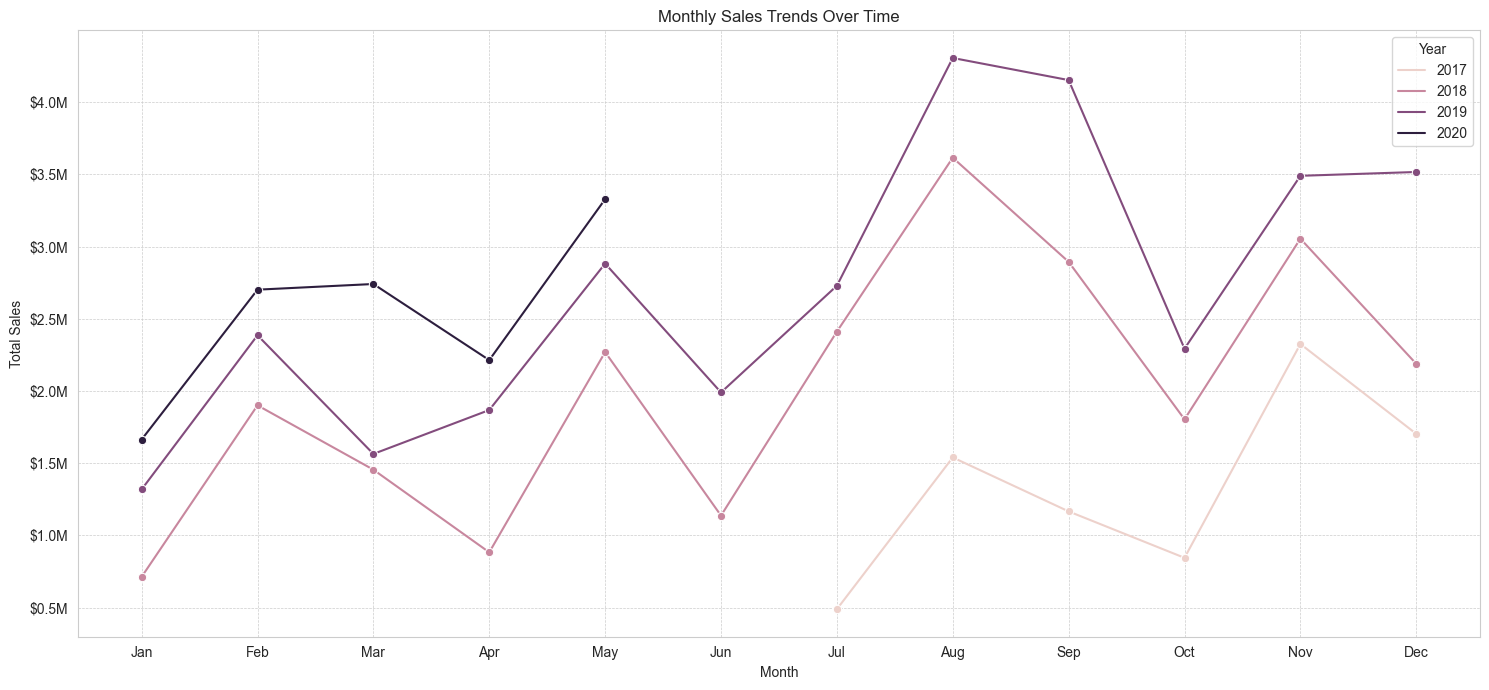

In [137]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_sales, x='MonthAbbrev', y='Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trends Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.legend(title='Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Apply millions_formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

The line plot illustrates the sales distribution throughout the year for each year present in the dataset.  
Each line represents a year, and the data points are the monthly sales for that year.  

There appears to be a consistent increase in sales towards the end of each year, especially in November and December. This could be due to holiday promotions, year-end sales, or other marketing initiatives.  
The noticeable dip in sales around June 2018 aligns with the significant loss you highlighted earlier. Similarly, there's another dip starting from June 2019 and extending to September 2019.  
Despite the dip in sales in the middle of 2019, there seems to be a recovery in early 2020. Sales in the first few months of 2020 are higher than the corresponding months in previous years.
The company seems to recover from the dips, but it's crucial to understand the reasons behind these drops.


#### Yearly growth for each month  
Calculating the yearly growth for each month

In [138]:
# Note: The pct_change() method computes the percentage difference in the Sales column compared to the previous year.
monthly_sales['Yearly Growth (%)'] = monthly_sales.groupby('Month')['Sales'].pct_change() * 100


In [139]:
# Here we are using dropna because we assume that the first missing values are related to how the pct_change() function works.
# The pct_change() function calculates the percentage change from the previous period.  
# For the first year in the dataset, there are no "previous periods" (i.e., the same months in the previous year) to compare with.  
# As a result, pct_change() returns NaN for each of these entries (2017 and 2018).  
monthly_sales.dropna(subset=['Yearly Growth (%)'], inplace=True)

In [140]:
# how sales in a specific month (e.g., January 2023) compare to sales in the same month of the previous year (e.g., January 2022).
# Filter out the first year since we don't have a previous year to compare against
monthly_sales_growth = monthly_sales[monthly_sales['Year'] > monthly_sales['Year'].min()]
monthly_sales_growth

,Year,Month,Sales,MonthAbbrev,Yearly Growth (%)
18,2019,1,1318592.01,Jan,84.876248
19,2019,2,2386073.19,Feb,25.530311
20,2019,3,1564294.92,Mar,7.490973
21,2019,4,1868433.35,Apr,111.597975
22,2019,5,2882637.58,May,27.004113
23,2019,6,1990249.25,Jun,75.005137
24,2019,7,2729167.03,Jul,13.170244
25,2019,8,4306549.14,Aug,19.099862
26,2019,9,4153399.35,Sep,43.485541
27,2019,10,2293200.43,Oct,27.105074


In [141]:
monthly_sales_growth['Month_Abbrev'] = monthly_sales['Month'].map(month_map)

/var/folders/vn/_14m11t94sq7t144kq41kqxm0000gn/T/ipykernel_55897/718617910.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



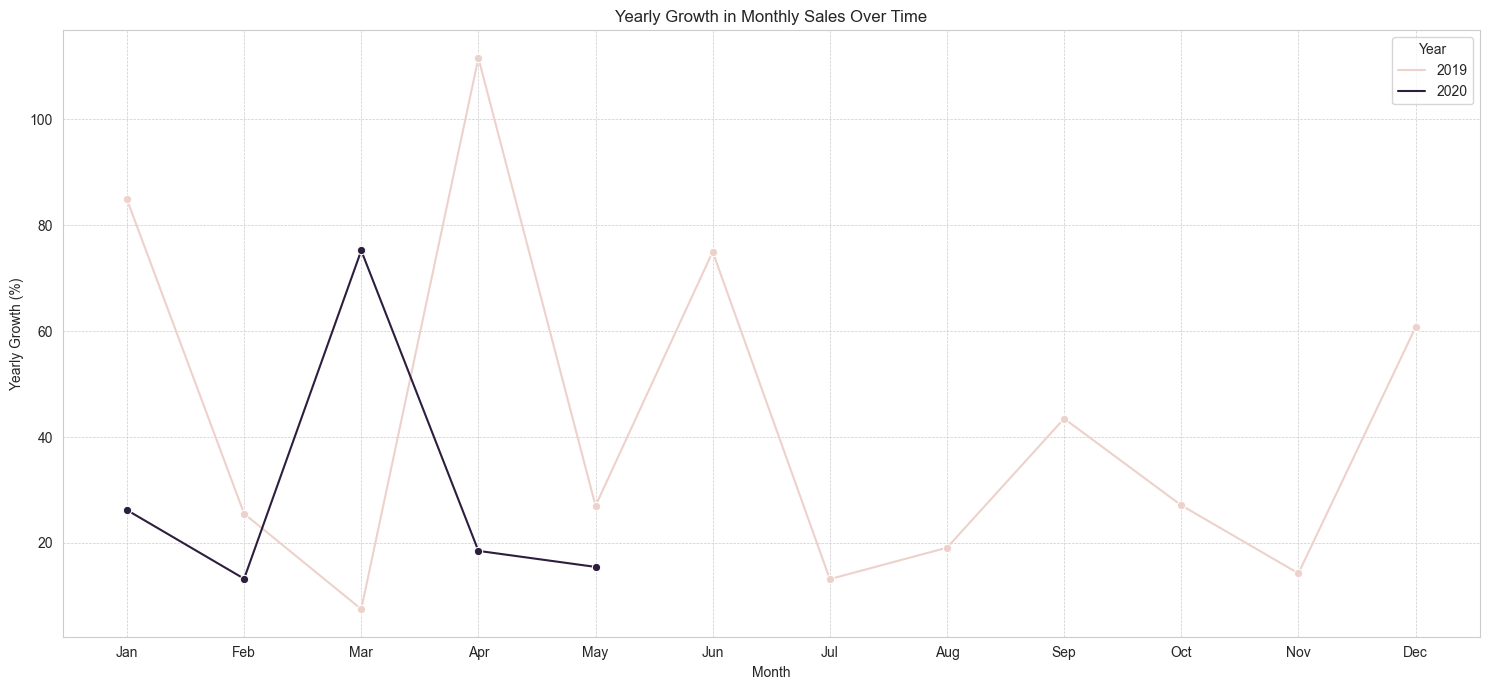

In [142]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_sales_growth, x='Month_Abbrev', y='Yearly Growth (%)', hue='Year', marker='o')
plt.title('Yearly Growth in Monthly Sales Over Time')
plt.ylabel('Yearly Growth (%)')
plt.xlabel('Month')
plt.legend(title='Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Some sharp fluctuations in growth percentages, with some months showing very high growth and others displaying significant losses.  
For instance, June 2019 exhibits a sharp decline in growth when compared to June 2018, which corresponds to the dip in sales we observed earlier. 2017 and 2018 and not included due to pct_change() behaviour.    


#### Profit Analysis
##### Profit by Region

In [143]:
# Calculate the profit for each sale (Sales - Cost) and analyze which products or regions bring in the most profit.

# In the df_sales DataFrame, create a new column named 'Profit' which is the difference between 'Sales' and 'Cost'.
df_sales['Profit'] = df_sales['Sales'] - df_sales['Cost']


# Merge sales with region
merged_df_region = pd.merge(df_sales, df_region, on='SalesTerritoryKey', how='left')

# Aggregate profit by region
profit_by_region = merged_df_region.groupby('Region')['Profit'].sum().reset_index()

profit_by_region = profit_by_region.sort_values(by='Profit', ascending=False)

##### Profit by Product

In [144]:
# Merge the df_sales DataFrame with df_product on the 'ProductKey' column to get the product names. Then, group by product name and sum the 'Profit' column to determine the profit per product.

# Merge sales with product
merged_df_product = pd.merge(df_sales, df_product, on='ProductKey', how='left')

# Aggregate profit by product
profit_by_product = merged_df_product.groupby('Product')['Profit'].sum().reset_index()

profit_by_product = profit_by_product.sort_values(by='Profit', ascending=False)

In [145]:
product_sales_agg = merged_df_product.groupby('Product')['Sales'].sum().reset_index()

# Merge with Product dataset to get standard cost
product_sales_cost = pd.merge(product_sales_agg, df_product[['Product', 'Standard Cost']], on="Product", how="left")

# Calculate correlation coefficient
correlation = product_sales_cost['Sales'].corr(product_sales_cost['Standard Cost'])

print(f"The correlation between standard cost and sales volume is: {correlation:.2f}")

The correlation between standard cost and sales volume is: 0.68


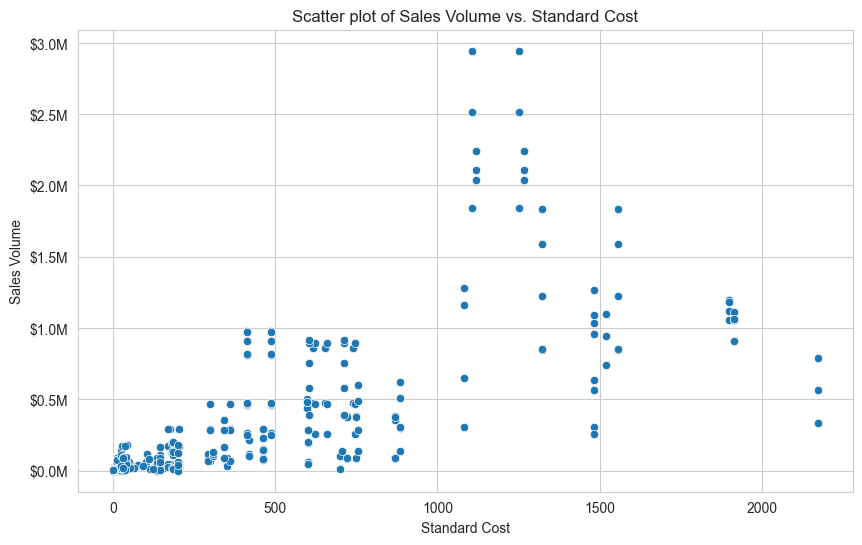

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_sales_cost, x='Standard Cost', y='Sales')
plt.title("Scatter plot of Sales Volume vs. Standard Cost")
plt.xlabel("Standard Cost")
plt.ylabel("Sales Volume")
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

This output indicates a strong positive linear relationship between the standard cost of a product and its sales volume.   
As the standard cost of a product increases, the sales volume also tends to increase.  Products at the with lower sales volumes might be low-cost products that are not selling so well.

##### Simple Predictive Analytics  

Correlating and Analysing Product Standard Cost and Sales cost.    

This section will offer insights into how the cost of producing a product relates to its sales value.  
A strong positive correlation might suggest that as the standard cost increases, the sales value also increases, which could be the case for luxury or high-end products.    
A negative correlation might suggest that products with lower production costs tend to sell more, which could be the case for mass-market products.  


In [147]:
product_sales_cost

,Product,Sales,Standard Cost
0,AWC Logo Cap,30658.42,5.71
1,AWC Logo Cap,30658.42,5.23
2,AWC Logo Cap,30658.42,6.92
3,Bike Wash - Dissolver,10179.94,2.97
4,Cable Lock,16249.00,10.31
...,...,...,...
330,"Women's Mountain Shorts, M",30190.81,26.18
331,"Women's Mountain Shorts, S",108582.71,26.18
332,"Women's Tights, L",94076.88,30.93
333,"Women's Tights, M",17726.06,30.93


###### Dealing with Outliers

In [148]:
product_sales_cost.describe()

,Sales,Standard Cost
count,3.350000e+02,335.000000
mean,3.611624e+05,468.241373
std,5.195036e+05,518.285011
min,1.627000e+02,0.860000
25%,4.093803e+04,41.115000
50%,1.240796e+05,300.120000
75%,4.709007e+05,699.090000
max,2.944666e+06,2171.290000


Count:
Both columns have 335 values, indicating that there are no missing values in these columns.

Mean:
The average sales for the products is approximately 361,162.40.
The average standard cost for the products is approximately 468.24.

Standard Deviation:
The sales have a standard deviation of approximately $519,503.60$, which is relatively high and indicates a wide range of sales values.
The standard cost has a standard deviation of $518.29$, indicating variability in the cost of products.

Min:
The minimum sales value is 162.70.
The minimum standard cost is 0.86.

25%:
25% of the products have sales less than or equal to approximately 40,938.03.
25% of the products have a standard cost less than or equal to 41.12.

Median (50%):
Half of the products have sales less than or equal to approximately 124,079.60.
Half of the products have a standard cost less than or equal to 300.12.

75%:
75% of the products have sales less than or equal to approximately 470,900.70.
75% of the products have a standard cost less than or equal to 699.09.

Max:
The maximum sales value for a product is approximately 2,944,666.00.
The maximum standard cost is 2,171.29.

Observations:
The range of sales values is large, from a minimum of $162.70$ to a maximum of $2.944$ million.  
The high standard deviation also points to this variability in sales.  
The standard cost has a wide range as well, from as low as $0.86$ to as high as 2,171.29.  
Given the large standard deviations, there might be some products that have significantly higher sales or costs than others, leading to outliers.  

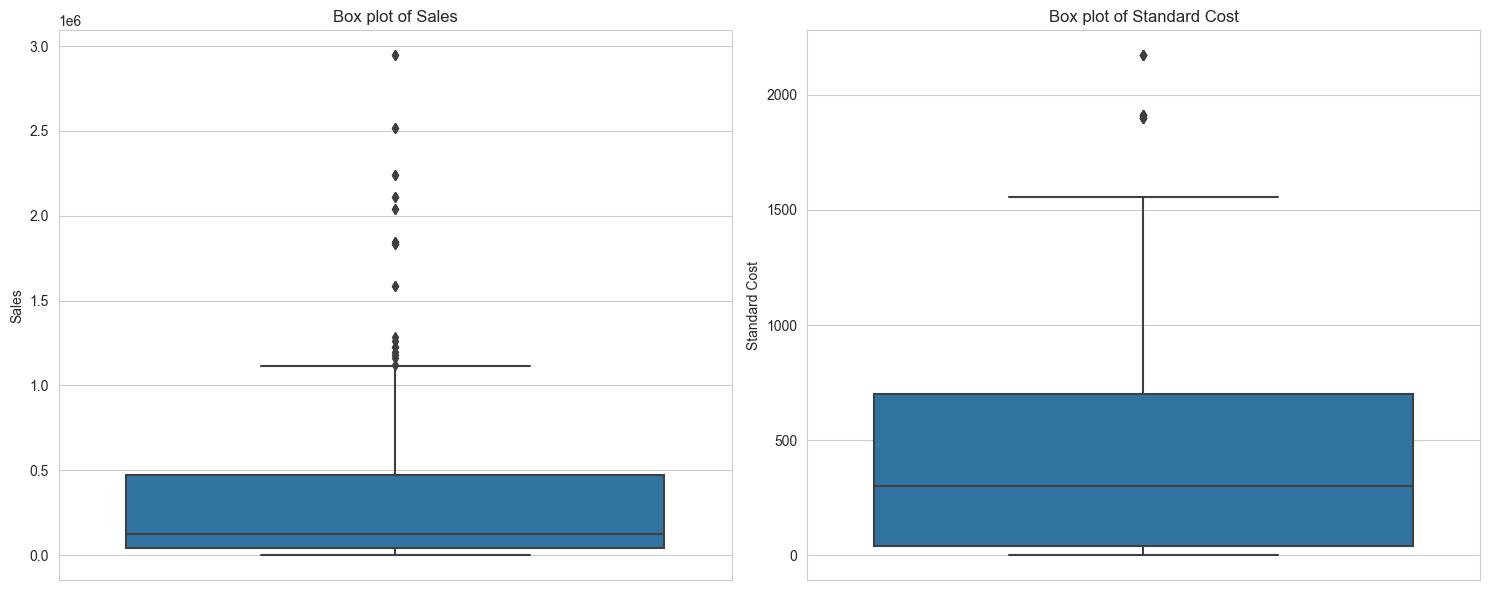

In [149]:
#### Box plots for the 'Sales' and 'Standard Cost' columns
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Create box plots for Sales and Standard Cost columns
plt.subplot(1, 2, 1)
sns.boxplot(y=product_sales_cost['Sales'])
plt.title('Box plot of Sales')

plt.subplot(1, 2, 2)
sns.boxplot(y=product_sales_cost['Standard Cost'])
plt.title('Box plot of Standard Cost')

plt.tight_layout()
plt.show()

For the Sales datapoints, there are several values above the upper whisker of the box plot, indicating potential outliers. These values are significantly higher than the majority of the sales data.  
Similarly, in the Standard Cost, there are a few data points above the upper whisker, suggesting potential outliers in the standard cost.  

Given these outliers, instead of imputing them, I used the IQR method to calculate the interquartile range for both columns, defining values outside 1.5 x IQR below Q1 or above Q3 as outliers.  

In [150]:
def detect_outliers(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]

    return outliers

# Detect outliers for 'Sales' and 'Standard Cost'
sales_outliers = detect_outliers(product_sales_cost['Sales'])
standard_cost_outliers = detect_outliers(product_sales_cost['Standard Cost'])

sales_outliers, standard_cost_outliers

(185    1196701.87
 186    1121034.71
 187    1181379.40
 193    2944665.88
 194    2944665.88
 195    2517355.08
 196    2517355.08
 197    1845368.54
 198    1845368.54
 199    2240091.34
 200    2240091.34
 201    2108685.83
 202    2108685.83
 203    2038938.83
 204    2038938.83
 233    1832750.05
 234    1832750.05
 235    1586672.94
 236    1586672.94
 237    1226737.49
 238    1226737.49
 246    1163421.46
 249    1283443.06
 309    1263913.32
 Name: Sales, dtype: float64,
 185    1898.09
 186    1898.09
 187    1898.09
 188    1898.09
 189    1912.15
 190    1912.15
 191    1912.15
 192    1912.15
 228    2171.29
 229    2171.29
 230    2171.29
 231    2171.29
 232    2171.29
 Name: Standard Cost, dtype: float64)

There are 24 outlier values for the 'Sales' column, ranging from approximately 1,116,421.46 to 2,944,665.88.  

There are 13 outlier values for the 'Standard Cost' column, ranging from approximately 1,898.09 to 2,171.29.  
These outlier values deviate significantly from the rest of the data and may warrant further investigation to understand the context behind such high sales or costs.  


Since an outlier might sometimes represent genuine data I chose scaling methods that are more robust to outliers.  
For instance, in sales data, holiday seasons (end of year promotions) might lead to spikes which could be considered outliers, but they are genuine sales spikes.  Also, highly performant sales people might just sell substantially more than others because they cover larger high performing regions.   

In [151]:
from sklearn.preprocessing import RobustScaler

# Define and fit the RobustScaler
scaler = RobustScaler()
product_sales_cost_scaled = product_sales_cost.copy()
product_sales_cost_scaled[['Sales', 'Standard Cost']] = scaler.fit_transform(product_sales_cost[['Sales', 'Standard Cost']])

# Display the first few rows of the scaled dataframe
product_sales_cost_scaled.head()

,Product,Sales,Standard Cost
0,AWC Logo Cap,-0.217277,-0.447449
1,AWC Logo Cap,-0.217277,-0.448178
2,AWC Logo Cap,-0.217277,-0.445610
3,Bike Wash - Dissolver,-0.264906,-0.451613
4,Cable Lock,-0.250791,-0.440457


Using the RobustScaler values are now centered around the median and scaled according to the IQR.  

##### Using the Random Forest algorithm  

Using the Random Forest algorithm, this model will predict 'Sales' based on the 'Standard Cost' after robust scaling. I start by splitting the data into training and testing sets, training the model on the training set, and then evaluating its performance on the testing set.  

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = product_sales_cost_scaled[['Standard Cost']]
y = product_sales_cost_scaled['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.125293843273366, 0.9066765551203126)

A Mean Squared Error (MSE) of 0.1253 represents the average of the squares of the errors between the true and predicted values.  

R-squared of 0.9067, shows that approximately 90.67% of the variance in the 'Sales' column can be explained by the 'Standard Cost' column. A  value close to 1 indicates a good fit of the model.  
The model performs well on the test data, and the results indicate that it's resistant to the impact of outliers, as expected from a tree-based method like Random Forest.  

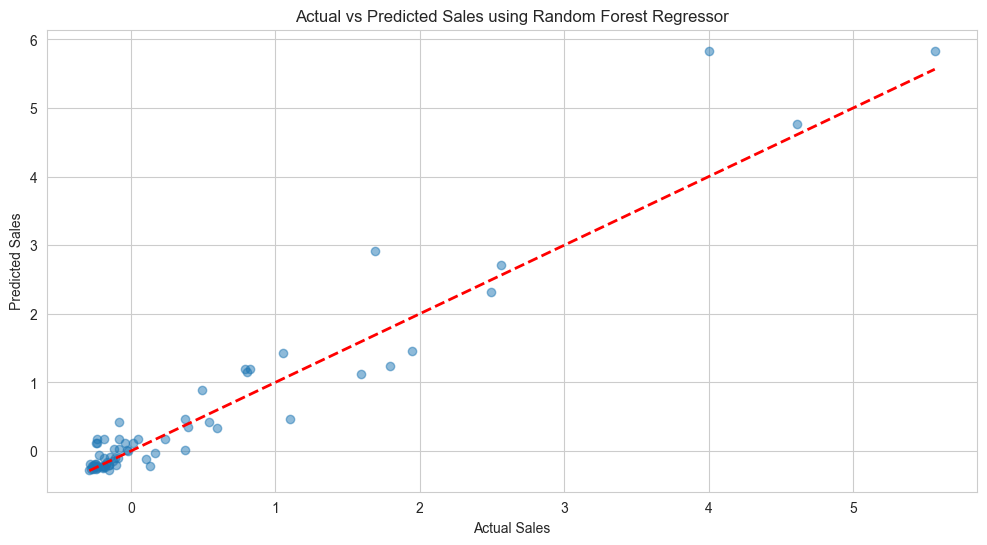

In [153]:
# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales using Random Forest Regressor')
plt.grid(True)
plt.show()

##### Comparing with a Linear Regression model

In [154]:
# Prepare the data

# Feature Matrix
X = product_sales_cost[['Standard Cost']]

# Target Variable
y = product_sales_cost['Sales']

In [155]:
# 20% of the dataset will be reserved for the test set, while the remaining 80% will be used for the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [157]:
# Make predictions using the test set
y_pred = model.predict(X_test)

In [158]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 118036489405.10852
R^2 Score: 0.5244286078261335


The model captures about 52.44% of the variability in sales based on the standard cost, which is a moderate amount of the total variability.  The remaining 47.56% of the variability is not explained by the model.    
A score of 0.5244 can be considered moderate and suggests that there's a relationship between the standard cost and sales volume.  
The MSE is relatively high, suggesting that there are significant differences between the predicted and actual sales values.    

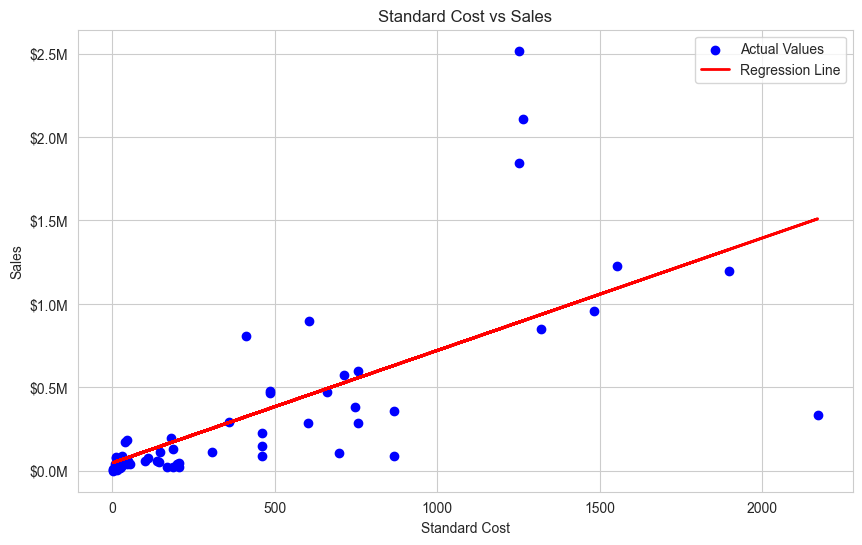

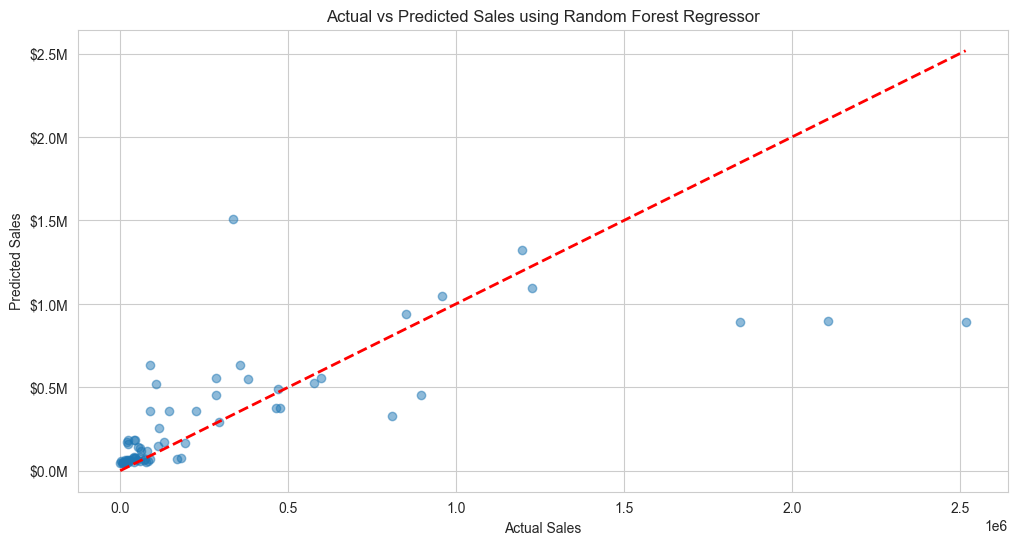

In [159]:
plt.figure(figsize=(10,6))

plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.title('Standard Cost vs Sales')
plt.xlabel('Standard Cost')
plt.ylabel('Sales')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.legend()
plt.show()

# repeating the Random Forest Regressor for visualisation purposes
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales using Random Forest Regressor')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.grid(True)
plt.show()

##### Time series analysis of profit over time (monthly)

In [160]:
monthly_profit = df_sales.groupby(['Year', 'Month'])['Profit'].sum().reset_index()

In [161]:
monthly_profit

,Year,Month,Profit
0,2017,7,17033.10
1,2017,8,70612.20
2,2017,9,57849.09
3,2017,10,27702.79
4,2017,11,89691.23
5,2017,12,70357.20
6,2018,1,22799.89
7,2018,2,70313.56
8,2018,3,58512.97
9,2018,4,28364.85


In [162]:
# find the month with the highest profit for each year
max_profit_per_year = monthly_profit.groupby('Year')['Profit'].idxmax()

# extract rows corresponding to the months with highest profit for each year
max_profit_rows = monthly_profit.loc[max_profit_per_year]

# find the month with the lowest profit for each year
min_profit_per_year = monthly_profit.groupby('Year')['Profit'].idxmin()

# extract rows corresponding to the months with lowest profit for each year
min_profit_rows = monthly_profit.loc[min_profit_per_year]

max_profit_rows, min_profit_rows

(    Year  Month     Profit
 4   2017     11   89691.23
 14  2018      9  158759.87
 22  2019      5  117090.75
 31  2020      2   14284.23,
     Year  Month     Profit
 0   2017      7   17033.10
 11  2018      6 -469756.42
 26  2019      9 -172100.02
 34  2020      5  -12290.12)

2017  
The highest profit was in November, amounting to 89,691.23.  
The lowest profit was in July, which was the start of the dataset, with a profit of 17,033.10.  

2018  
The highest profit was in September, amounting to 158,759.87.  
However, June experienced the most significant loss, 469,756.42.  

2019  
The month of May saw the highest profit, with a total of 117,090.75.  
September was the least profitable month, with a loss of 172,100.02.  

2020  
February was the most profitable month with a profit of 14,284.23.  
May had the least profit, which was actually a loss of 12,290.12.  

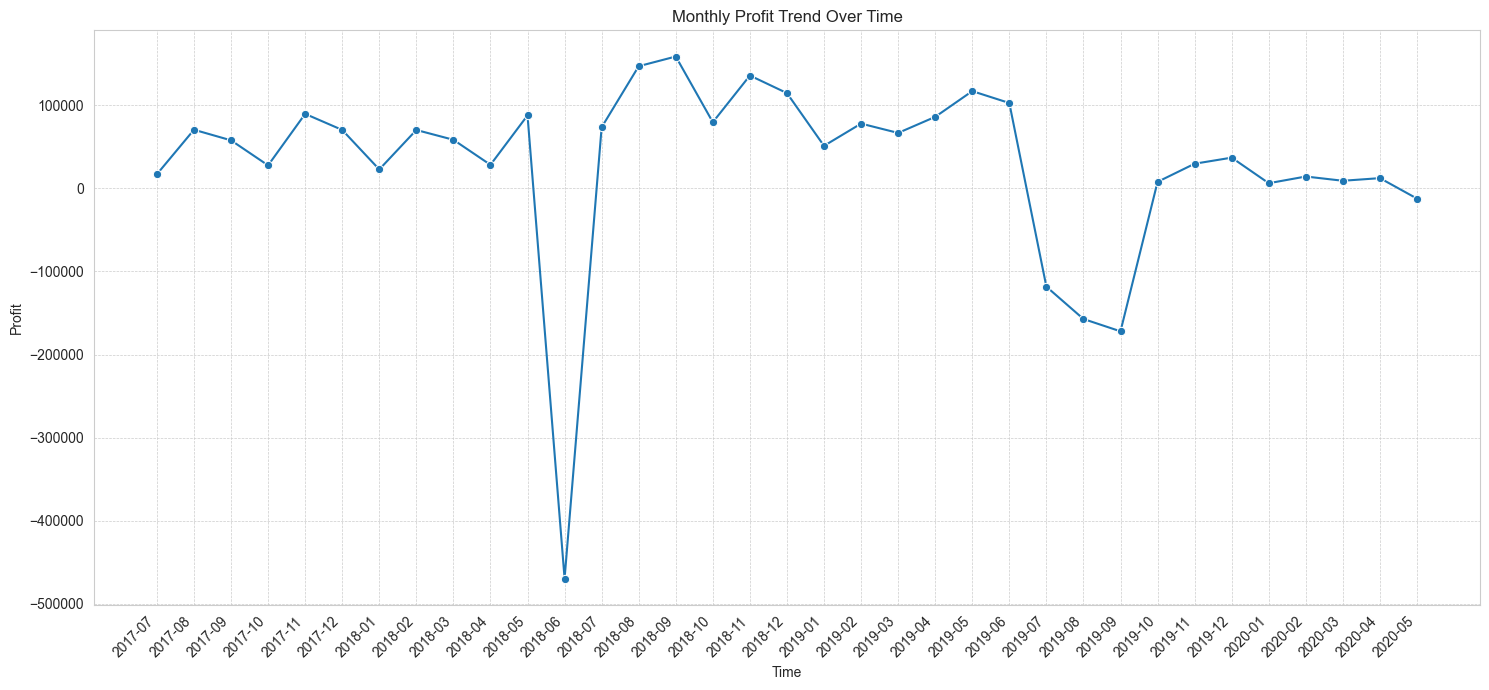

In [163]:
plt.figure(figsize=(15, 7))

# Create a datetime-like string for plotting (e.g., "2021-03" for March 2021)
# By using zfill(2), January is represented as "01" and December remains "12". 
# This makes the resulting 'YearMonth' values look like "2021-01", "2021-02", and so on.
monthly_profit['YearMonth'] = monthly_profit['Year'].astype(str) + '-' + monthly_profit['Month'].astype(str).str.zfill(2)

sns.lineplot(data=monthly_profit, x='YearMonth', y='Profit', marker='o')

plt.title('Monthly Profit Trend Over Time')
plt.ylabel('Profit')
plt.xlabel('Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The plot shows the aggregated monthly profit.  
Negative profit indicates that the costs associated with those sales were higher than the sales revenue itself, resulting in a loss.  
This can happen for several reasons.

Discounts or Returns: The selling price might be lower than the cost due to heavy discounts, or there might have been a significant number of returns which impacted revenue.  

Operational Costs: Other operational costs not accounted for in the dataset could result in a net loss even if the product is sold above its direct cost.  

Strategic Pricing: Sometimes, businesses sell at a loss to gain market share, expecting to profit in the long term.  

Data Entry Errors: Mistakes in data entry or issues in data collection can also result in apparent losses that aren't reflective of actual business operations.  

##### Understanding the most significant losses
###### June 2018

In [164]:
# Filter the Sales dataset for June 2018 transactions
june_2018_sales = df_sales[(df_sales['OrderDate'].dt.year == 2018) & (df_sales['OrderDate'].dt.month == 6)]

june_2018_sales.dtypes

SalesOrderNumber             object
OrderDate            datetime64[ns]
ProductKey                    int64
ResellerKey                   int64
EmployeeKey                   int64
SalesTerritoryKey             int64
Quantity                      int64
Unit Price                  float64
Sales                       float64
Cost                        float64
Year                          int32
Month                         int32
Profit                      float64
dtype: object

In [165]:
june_2018_sales.isna().sum()

SalesOrderNumber     0
OrderDate            0
ProductKey           0
ResellerKey          0
EmployeeKey          0
SalesTerritoryKey    0
Quantity             0
Unit Price           0
Sales                0
Cost                 0
Year                 0
Month                0
Profit               0
dtype: int64

In [166]:
# Calculate total sales by reseller for June 2018
reseller_sales_breakdown = june_2018_sales.groupby('ResellerKey').agg({
    'Sales': 'sum',
    'Cost': 'sum'
}).reset_index()

# Calculate the profit for each reseller
reseller_sales_breakdown['Profit'] = reseller_sales_breakdown['Sales'] - reseller_sales_breakdown['Cost']

# Sort by Sales to see top performing resellers
reseller_sales_sorted = reseller_sales_breakdown.sort_values(by='Sales', ascending=False).reset_index(drop=True)

reseller_sales_sorted

,ResellerKey,Sales,Cost,Profit
0,579,60079.03,60317.39,-238.36
1,91,58977.11,59278.07,-300.96
2,608,58422.70,112599.72,-54177.02
3,678,57018.54,113850.73,-56832.19
4,155,50154.29,50272.55,-118.26
...,...,...,...,...
63,116,419.46,413.15,6.31
64,96,419.46,413.15,6.31
65,330,356.90,352.14,4.76
66,561,356.90,352.14,4.76


Further investigate:

In [167]:
# Calculate the profit for each row in june_2018_sales
june_2018_sales['Profit'] = june_2018_sales['Sales'] - june_2018_sales['Cost']

# Recalculate total loss for June 2018
total_loss_june_2018 = june_2018_sales['Profit'].sum()

# Identify resellers with the highest losses (Top 5 for this analysis)
highest_losses_resellers = reseller_sales_sorted.nsmallest(5, 'Profit')

# Recalculate total loss contributed by the resellers with the highest losses
total_loss_high_loss_resellers = highest_losses_resellers['Profit'].sum()

# Recalculate the percentage contribution to the overall loss
percentage_contribution = (total_loss_high_loss_resellers / total_loss_june_2018) * 100

total_loss_june_2018, total_loss_high_loss_resellers, percentage_contribution

/var/folders/vn/_14m11t94sq7t144kq41kqxm0000gn/T/ipykernel_55897/1147162967.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(-469756.42000000004, -223474.05, 47.57232482314983)

Contribution to loss by the resellers with the highest losses

In [168]:
# Identify all resellers with losses for June 2018
all_loss_resellers = reseller_sales_sorted[reseller_sales_sorted['Profit'] < 0]

# Calculate total loss contributed by all loss-contributing resellers
total_loss_all_loss_resellers = all_loss_resellers['Profit'].sum()

# Calculate the percentage contribution to the overall loss by all loss-contributing resellers
percentage_contribution_all = (total_loss_all_loss_resellers / total_loss_june_2018) * 100

total_loss_all_loss_resellers, percentage_contribution_all

(-471118.15, 100.28988001909585)

The combined loss of all loss-contributing resellers was 471,118.15. These were responsible for 100.29% of the total loss in June 2018. A result that exceeds 100% indicates that while these resellers contributed losses, there might have been other resellers who had positive profits which slightly offset the overall loss.  
In essence, almost the entire loss in June 2018 can be attributed to the resellers who experienced losses.

This finding underscores the importance of addressing the challenges faced by these loss-contributing resellers.  

###### June 2019

In [169]:
# Filter the sales data for the period from June 2019 to September 2019
period_2019_sales = df_sales[(df_sales['OrderDate'].dt.year == 2019) &
                               (df_sales['OrderDate'].dt.month >= 6) &
                               (df_sales['OrderDate'].dt.month <= 9)]

# Group by month and calculate the total sales, cost, and profit for each month
monthly_2019_breakdown = period_2019_sales.groupby(period_2019_sales['OrderDate'].dt.month).agg({
    'Sales': 'sum',
    'Cost': 'sum'
}).reset_index()
monthly_2019_breakdown['Profit'] = monthly_2019_breakdown['Sales'] - monthly_2019_breakdown['Cost']

# Rename the month column for clarity
monthly_2019_breakdown.rename(columns={'OrderDate': 'Month'}, inplace=True)

monthly_2019_breakdown

,Month,Sales,Cost,Profit
0,6,1990249.25,1887464.78,102784.47
1,7,2729167.03,2847508.32,-118341.29
2,8,4306549.14,4463793.70,-157244.56
3,9,4153399.35,4325499.37,-172100.02


June 2019 saw a profit, but July, August and September resulted in losses.  
September 2019 had the largest loss among these months.  

Product Analysis for July, August, and September 2019

In [170]:
# Filter the sales data for the loss months: July, August, and September 2019
loss_period_2019_sales = df_sales[(df_sales['OrderDate'].dt.year == 2019) &
                                    (df_sales['OrderDate'].dt.month >= 7) &
                                    (df_sales['OrderDate'].dt.month <= 9)]

# Group by product and calculate total sales, cost, and profit for each product during this period
product_breakdown_2019 = loss_period_2019_sales.groupby('ProductKey').agg({
    'Sales': 'sum',
    'Cost': 'sum'
}).reset_index()
product_breakdown_2019['Profit'] = product_breakdown_2019['Sales'] - product_breakdown_2019['Cost']

# Sort by profit to identify products with the most significant losses
product_breakdown_2019_sorted = product_breakdown_2019.sort_values(by='Profit').reset_index(drop=True)

# Display top 10 products with the most significant losses
product_breakdown_2019_sorted.head(10)

,ProductKey,Sales,Cost,Profit
0,564,282274.48,438653.69,-156379.21
1,561,234592.98,364556.82,-129963.84
2,562,136369.09,211917.20,-75548.11
3,563,73429.51,114109.28,-40679.77
4,583,404204.85,441664.08,-37459.23
5,572,79506.28,109823.72,-30317.44
6,586,78838.16,108900.84,-30062.68
7,568,77835.98,107516.47,-29680.49
8,580,360812.54,387538.58,-26726.04
9,565,65809.82,90904.51,-25094.69


In [171]:
# Group by salesperson and calculate total sales, cost, and profit for each salesperson during the loss period
salesperson_performance_2019 = loss_period_2019_sales.groupby('EmployeeKey').agg({
    'Sales': 'sum',
    'Cost': 'sum',
    'Quantity': 'sum'
}).reset_index()
salesperson_performance_2019['Profit'] = salesperson_performance_2019['Sales'] - salesperson_performance_2019['Cost']

# Sort by profit to identify salespeople with the most significant losses
salesperson_performance_sorted = salesperson_performance_2019.sort_values(by='Profit').reset_index(drop=True)

# Display the top salespeople with the most significant losses
salesperson_performance_sorted.head(10)

,EmployeeKey,Sales,Cost,Quantity,Profit
0,287,768390.18,823322.31,2610,-54932.13
1,295,511510.66,565175.81,2245,-53665.15
2,296,361301.57,414746.29,1160,-53444.72
3,292,966523.71,1015055.60,3460,-48531.89
4,288,830829.40,872674.94,3006,-41845.54
5,293,406781.62,446214.86,1166,-39433.24
6,291,1205313.41,1230355.18,4483,-25041.77
7,284,473214.68,498113.32,2032,-24898.64
8,285,669043.20,690735.19,2535,-21691.99
9,283,1033941.61,1055013.28,4255,-21071.67


In [172]:
# Extract the top 5 salespeople with the most significant losses from the earlier analysis
top_loss_salespeople = salesperson_performance_sorted['EmployeeKey'].head(5).tolist()

# Filter the sales data to include only transactions from these salespeople
top_loss_salespeople_transactions = df_sales[df_sales['EmployeeKey'].isin(top_loss_salespeople)]

# Group the transactions by salesperson and product to get an overview
salesperson_product_breakdown = top_loss_salespeople_transactions.groupby(['EmployeeKey', 'ProductKey']).agg({
    'Sales': 'sum',
    'Cost': 'sum',
    'Quantity': 'sum'
}).reset_index()
salesperson_product_breakdown['Profit'] = salesperson_product_breakdown['Sales'] - salesperson_product_breakdown['Cost']

# Sort the data by profit to see products with lowest profit (or highest loss) on top for each salesperson
salesperson_product_breakdown = salesperson_product_breakdown.sort_values(by=['EmployeeKey', 'Profit']).reset_index(drop=True)

salesperson_product_breakdown.head(15)

,EmployeeKey,ProductKey,Sales,Cost,Quantity,Profit
0,287,561,93455.68,117073.13,79,-23617.45
1,287,348,131286.96,151847.57,80,-20560.61
2,287,349,114580.78,132866.60,70,-18285.82
3,287,344,109649.55,126202.19,66,-16552.64
4,287,351,109180.79,123376.13,65,-14195.34
5,287,564,70449.29,84470.46,57,-14021.17
6,287,327,62059.38,71059.19,146,-8999.81
7,287,350,141513.11,149949.45,79,-8436.34
8,287,576,100130.92,108181.49,73,-8050.57
9,287,345,89759.61,97519.86,51,-7760.25


In [173]:
# Group the sales data by salesperson to get an overview of all salespeople's performance
all_salespeople_performance = loss_period_2019_sales.groupby('EmployeeKey').agg({
    'Sales': 'sum',
    'Cost': 'sum',
    'Quantity': 'count'
}).reset_index()
all_salespeople_performance['Profit'] = all_salespeople_performance['Sales'] - all_salespeople_performance['Cost']

# Calculate averages for all salespeople
average_sales_all = all_salespeople_performance['Sales'].mean()
average_profit_all = all_salespeople_performance['Profit'].mean()
average_transaction_count_all = all_salespeople_performance['Quantity'].mean()

# Calculate averages for the top loss-contributing salespeople
average_sales_top_loss = salesperson_performance_sorted[salesperson_performance_sorted['EmployeeKey'].isin(top_loss_salespeople)]['Sales'].mean()
average_profit_top_loss = salesperson_performance_sorted[salesperson_performance_sorted['EmployeeKey'].isin(top_loss_salespeople)]['Profit'].mean()
average_transaction_count_top_loss = salesperson_performance_sorted[salesperson_performance_sorted['EmployeeKey'].isin(top_loss_salespeople)]['Quantity'].mean()

# Create a dataframe for comparative analysis
comparative_data = pd.DataFrame({
    'Metric': ['Average Sales', 'Average Profit', 'Average Transaction Count'],
    'All Salespeople': [average_sales_all, average_profit_all, average_transaction_count_all],
    'Top Loss Salespeople': [average_sales_top_loss, average_profit_top_loss, average_transaction_count_top_loss]
})

comparative_data

,Metric,All Salespeople,Top Loss Salespeople
0,Average Sales,658183.265882,687711.104
1,Average Profit,-26334.462941,-50483.886
2,Average Transaction Count,570.588235,2496.200


Key Observations:

The top loss-contributing salespeople have a slightly higher average sales figure compared to the average of all salespeople. This indicates that they are indeed selling a substantial amount, but profitability is a concern.  

The average profit for the top loss-contributing salespeople is almost double the negative value compared to the average of all salespeople. They have higher sales but lower profitability.  

The top loss-contributing salespeople handle significantly more transactions on average than the typical salesperson.  This could indicate that they might have a wider clientele.  

These insights highlight that while the top loss-contributing salespeople are making more sales, they are not as profitable as the average salesperson, between July, August, and September 2019.

##### High-Value Transactions

In [174]:
# Check if there were any particularly large sales transactions with significant losses during June and July 2018 
high_loss_transactions = df_sales[(df_sales['Year'] == 2018) & (df_sales['Month'].isin([5, 7]))]

# Sort by Profit to see the 20 largest losses at the top
high_loss_transactions = high_loss_transactions.sort_values(by='Profit').head(20)
high_loss_transactions

,SalesOrderNumber,OrderDate,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost,Year,Month,Profit
57509,SO46669,2018-07-27,327,538,288,10,17,234.90,3993.30,8274.01,2018,7,-4280.71
57172,SO46660,2018-07-23,327,166,283,4,16,234.90,3758.40,7787.31,2018,7,-4028.91
57302,SO46672,2018-07-27,327,81,285,5,15,234.90,3523.50,7300.60,2018,7,-3777.10
56955,SO46616,2018-07-06,327,514,291,6,13,234.90,3053.70,6327.19,2018,7,-3273.49
55925,SO46643,2018-07-16,327,290,289,1,12,234.90,2818.80,5840.48,2018,7,-3021.68
52921,SO46652,2018-07-19,327,139,292,7,8,234.90,1879.20,3893.65,2018,7,-2014.45
48317,SO46629,2018-07-10,327,670,283,3,6,234.90,1409.40,2920.24,2018,7,-1510.84
55927,SO46643,2018-07-16,368,290,289,1,12,1417.14,17005.68,18225.44,2018,7,-1219.76
57608,SO46660,2018-07-23,343,166,283,4,21,430.64,9043.44,10220.84,2018,7,-1177.40
57602,SO46616,2018-07-06,323,514,291,6,21,430.64,9043.44,10220.84,2018,7,-1177.40


##### Volume of Transactions

In [175]:
# Filter sales data for transactions with losses in the months of interest
loss_transactions = df_sales[(df_sales['Year'] == 2018) & (df_sales['Month'].isin([5, 7])) & (df_sales['Profit'] < 0)]

# Count the number of such transactions with losses
num_loss_transactions = loss_transactions.shape[0]
num_loss_transactions

804

##### Profit margins 

The profit margin for each month can be calculated as:    
  
$
\text{Profit Margin (\%)} = \left( \frac{\text{Sales} - \text{Cost}}{\text{Sales}} \right) \times 100
$  


In [176]:
# Calculate Monthly Sales and Cost
monthly_sales_cost = df_sales.groupby(['Year', 'Month']).aggregate({'Sales': 'sum', 'Cost': 'sum'}).reset_index()
monthly_sales_cost

,Year,Month,Sales,Cost
0,2017,7,489328.40,472295.30
1,2017,8,1540072.02,1469459.82
2,2017,9,1166332.45,1108483.36
3,2017,10,844832.71,817129.92
4,2017,11,2325754.91,2236063.68
5,2017,12,1703435.09,1633077.89
6,2018,1,713229.54,690429.65
7,2018,2,1900794.46,1830480.90
8,2018,3,1455280.27,1396767.30
9,2018,4,883010.98,854646.13


In [177]:
# Calculate Profit Margin
monthly_sales_cost['Profit Margin (%)'] = ((monthly_sales_cost['Sales'] - monthly_sales_cost['Cost']) / monthly_sales_cost['Sales']) * 100
monthly_sales_cost['Profit Margin (%)']

0      3.480914
1      4.584993
2      4.959914
3      3.279086
4      3.856435
5      4.130313
6      3.196711
7      3.699167
8      4.020735
9      3.212287
10     3.871928
11   -41.306277
12     3.050205
13     4.067791
14     5.484603
15     4.415255
16     4.447656
17     5.241587
18     3.883422
19     3.268502
20     4.266766
21     4.607922
22     4.061931
23     5.164402
24    -4.336169
25    -3.651289
26    -4.143594
27     0.342453
28     0.850392
29     1.052361
30     0.374060
31     0.528663
32     0.334634
33     0.556941
34    -0.369227
Name: Profit Margin (%), dtype: float64

I first aggregated the sales and cost data on a monthly basis and then applied the profit margin formula on this aggregated data to get the profit margin for each month.  
The final output is the profit margin as a percentage for each month.  

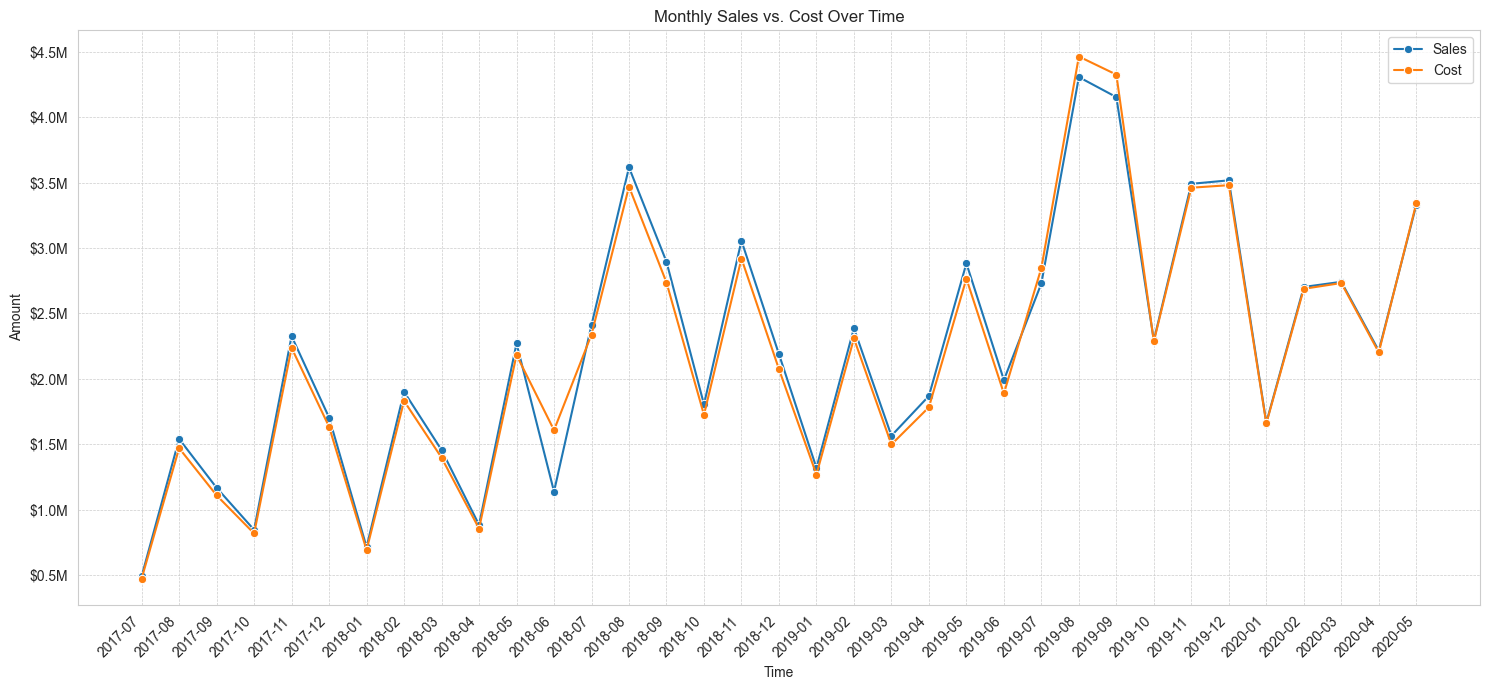

In [178]:
monthly_sales_cost['YearMonth'] = monthly_sales_cost['Year'].astype(str) + '-' + monthly_sales_cost['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_sales_cost, x='YearMonth', y='Sales', label='Sales', marker='o')
sns.lineplot(data=monthly_sales_cost, x='YearMonth', y='Cost', label='Cost', marker='o')
plt.ylabel('Amount')
plt.xlabel('Time')
plt.title('Monthly Sales vs. Cost Over Time')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Although the sales line appears to be consistently above the cost line, it indicates a positive profit margin.    
When the two lines come close or intersect, this can indicate slim profit margins or losses.  
The highest profit margin was observed in September 2018, with a value of approximately 5.48%.  
June 2018 stands out with a significant negative profit margin of approximately -41.31%. This is in line with our earlier findings of a significant loss in this month.  
There's a noticeable decline in the profit margins in 2019 and into 2020, with several months even having negative profit margins.  
Especially in 2019 and 2020, costs come very close to or exceed sales, indicating lower profit margins.  


In [179]:
monthly_sales_cost

,Year,Month,Sales,Cost,Profit Margin (%),YearMonth
0,2017,7,489328.40,472295.30,3.480914,2017-07
1,2017,8,1540072.02,1469459.82,4.584993,2017-08
2,2017,9,1166332.45,1108483.36,4.959914,2017-09
3,2017,10,844832.71,817129.92,3.279086,2017-10
4,2017,11,2325754.91,2236063.68,3.856435,2017-11
5,2017,12,1703435.09,1633077.89,4.130313,2017-12
6,2018,1,713229.54,690429.65,3.196711,2018-01
7,2018,2,1900794.46,1830480.90,3.699167,2018-02
8,2018,3,1455280.27,1396767.30,4.020735,2018-03
9,2018,4,883010.98,854646.13,3.212287,2018-04


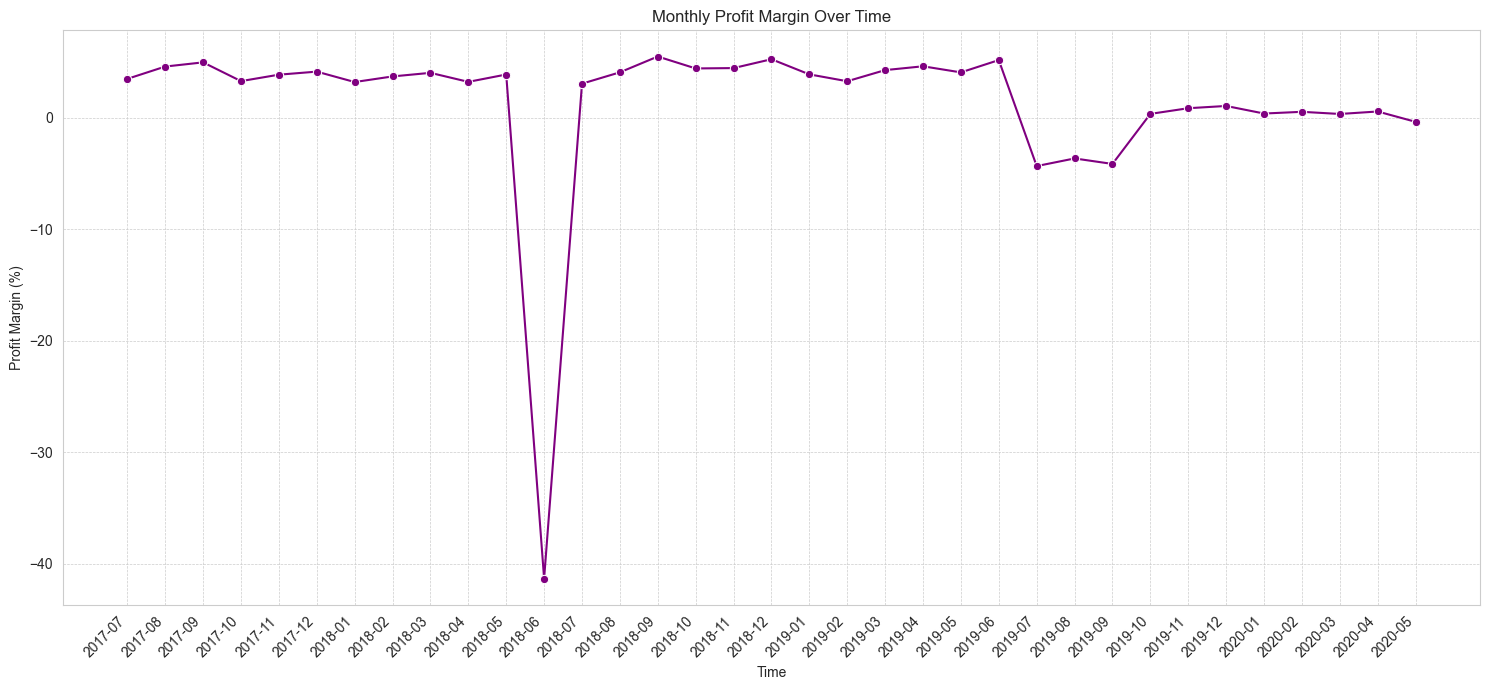

In [180]:
# Plotting Profit Margin separately
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_sales_cost, x='YearMonth', y='Profit Margin (%)', color='purple', marker='o')
plt.title('Monthly Profit Margin Over Time')
plt.ylabel('Profit Margin (%)')
plt.xlabel('Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The dips to negative profit margins might result from increased costs without a corresponding increase in sales.    

In [181]:
# Filter sales data for September 2018
sales_sept_2018_final = df_sales[(df_sales['OrderDate'].dt.year == 2018) & (df_sales['OrderDate'].dt.month == 9)]

# Aggregate profit by product for September 2018
profit_by_product_sept_2018_final = sales_sept_2018_final.groupby('ProductKey')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Merge with product data to get product names
profit_by_product_sept_2018_final = profit_by_product_sept_2018_final.merge(df_product, on='ProductKey', how='left')

# Aggregate profit by region for September 2018
profit_by_region_sept_2018_final = sales_sept_2018_final.groupby('SalesTerritoryKey')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Merge with region data to get region names
profit_by_region_sept_2018_final = profit_by_region_sept_2018_final.merge(df_region, on='SalesTerritoryKey', how='left')

top_product_final, top_product_profit_final = profit_by_product_sept_2018_final.iloc[0]['Product'], profit_by_product_sept_2018_final.iloc[0]['Profit']
top_region_final, top_region_profit_final = profit_by_region_sept_2018_final.iloc[0]['Region'], profit_by_region_sept_2018_final.iloc[0]['Profit']

top_product_final, top_product_profit_final, top_region_final, top_region_profit_final

('Mountain-200 Black, 42', 15032.2, 'Southwest', 65160.72000000001)

By evaluating the profit for each sale in September 2018, it was found that the product "Mountain-200 Black, 42" wsas the most profitable, bringing in a profit of approximately 15,032.20.    
Per region, "Southwest" emerges as the top-performing region, achieving a profit of approximately 65,160.72.    

#### Top-selling Products  

In this section we are:  
. Grouping the sales data by product  
. Summing the sales for each product  
. Sorting the products by their total sales  

In [182]:
top_products_sales = df_sales.groupby('ProductKey')['Sales'].sum().reset_index()

In [183]:
top_10_products = top_products_sales.sort_values(by='Sales', ascending=False).head(10)

In [184]:
top_10_products_names = pd.merge(top_10_products, df_product[['ProductKey', 'Product']], on='ProductKey', how='left')

In [185]:
top_10_products_names

,ProductKey,Sales,Product
0,359,1472920.24,"Mountain-200 Black, 38"
1,358,1471745.64,"Mountain-200 Black, 38"
2,360,1362221.16,"Mountain-200 Black, 42"
3,583,1283443.06,"Road-350-W Yellow, 48"
4,576,1263913.32,"Touring-1000 Blue, 60"
5,348,1196701.87,"Mountain-100 Black, 38"
6,350,1181379.40,"Mountain-100 Black, 44"
7,354,1176771.75,"Mountain-200 Silver, 42"
8,352,1173084.63,"Mountain-200 Silver, 38"
9,580,1163421.46,"Road-350-W Yellow, 40"


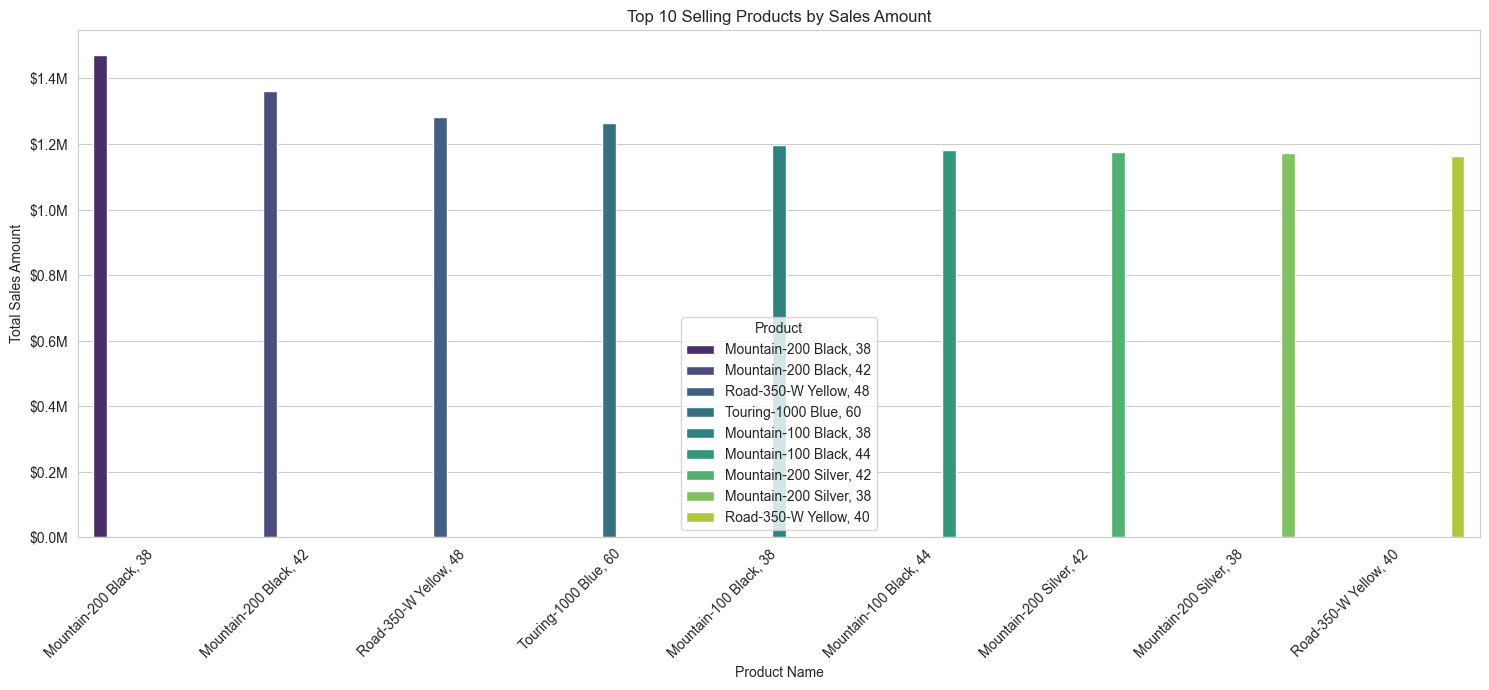

In [186]:
plt.figure(figsize=(15, 7))
sns.barplot(data=top_10_products_names, x='Product', y='Sales', hue='Product', palette='viridis')
plt.title('Top 10 Selling Products by Sales Amount')
plt.ylabel('Total Sales Amount')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')

# Apply millions_formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

The sales amount varies significantly among the top 10 products, with the leading product having a notably higher sales amount than the 10th product on the list.  

#### Sales by category and subcategory

Visualise sales by product category and subcategory using a pie chart    

I'm doing a left merge because we want to keep all sales records (from df_sales) even if there's no matching product information (in df_product).  
If a sales record doesn't have a matching 'ProductKey' in df_product, the columns from df_product will be filled with NaN for that row, but the sales record will still be retained.  

In [187]:
merged_df = pd.merge(df_sales, df_product, on='ProductKey', how='left')

In [188]:
merged_df

,SalesOrderNumber,OrderDate,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost,Year,Month,Profit,Product,Standard Cost,Color,Subcategory,Category,Background Color Format,Font Color Format
0,SO43897,2017-08-25,235,312,282,4,2,28.84,57.68,63.45,2017,8,-5.77,"Long-Sleeve Logo Jersey, XL",31.72,Multi,Jerseys,Clothing,#BC8F8F,#000000
1,SO43897,2017-08-25,351,312,282,4,2,2024.99,4049.98,3796.19,2017,8,253.79,"Mountain-100 Black, 48",1898.09,Black,Mountain Bikes,Bikes,#000000,#FFFFFF
2,SO43897,2017-08-25,348,312,282,4,2,2024.99,4049.98,3796.19,2017,8,253.79,"Mountain-100 Black, 38",1898.09,Black,Mountain Bikes,Bikes,#000000,#FFFFFF
3,SO43897,2017-08-25,232,312,282,4,2,28.84,57.68,63.45,2017,8,-5.77,"Long-Sleeve Logo Jersey, L",31.72,Multi,Jerseys,Clothing,#BC8F8F,#000000
4,SO44544,2017-11-18,292,312,282,4,2,818.70,1637.40,1413.62,2017,11,223.78,"HL Mountain Frame - Silver, 48",706.81,Silver,Mountain Frames,Components,#C0C0C0,#000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57846,SO69476,2020-05-15,476,667,283,2,21,38.49,808.29,549.70,2020,5,258.59,"Women's Mountain Shorts, L",26.18,Black,Shorts,Clothing,#000000,#FFFFFF
57847,SO69476,2020-05-15,474,667,283,2,19,38.49,731.31,497.35,2020,5,233.96,"Women's Mountain Shorts, S",26.18,Black,Shorts,Clothing,#000000,#FFFFFF
57848,SO69493,2020-05-18,482,89,283,2,20,4.94,98.80,67.25,2020,5,31.55,"Racing Socks, L",3.36,White,Socks,Clothing,#FFFFFF,#000000
57849,SO69503,2020-05-20,482,79,282,3,23,4.94,113.62,77.33,2020,5,36.29,"Racing Socks, L",3.36,White,Socks,Clothing,#FFFFFF,#000000


In [189]:
# Group the merged DataFrame by 'Category' and 'Subcategory', then sum the 'Sales' column
sales_by_category = merged_df.groupby(['Category', 'Subcategory'], observed=True)['Sales'].sum().reset_index()

In [190]:
# Sort the sales_by_category DataFrame by the 'Sales' column in descending order to get the categories and subcategories with the highest sales at the top
sales_by_category = sales_by_category.sort_values(by='Sales', ascending=False)

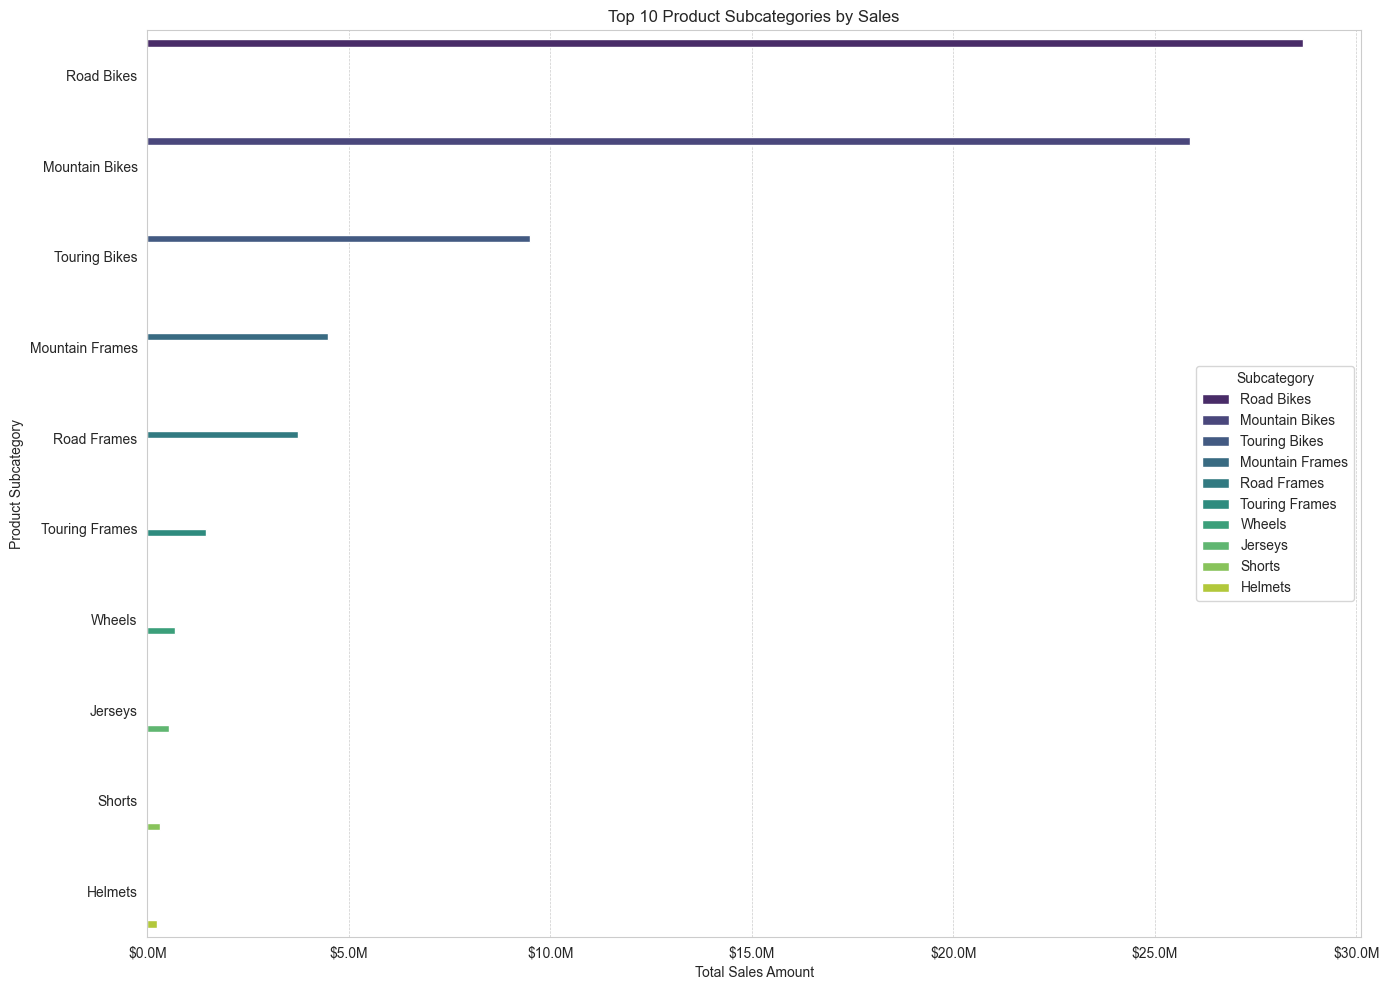

In [191]:
# Plotting top 10 product subcategories by sales using a horizontal bar chart
plt.figure(figsize=(14, 10))
sns.barplot(data=sales_by_category[:10], y='Subcategory', x='Sales', hue='Subcategory',  palette="viridis")

# Setting title and labels
plt.title('Top 10 Product Subcategories by Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Subcategory')
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.tight_layout()
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()

Flagship products among customers are Road Bikes and Mountain Bikes.  Any disruptions in the supply or demand for these products might have a more pronounced effect on overall sales.  

#### Sales By Region

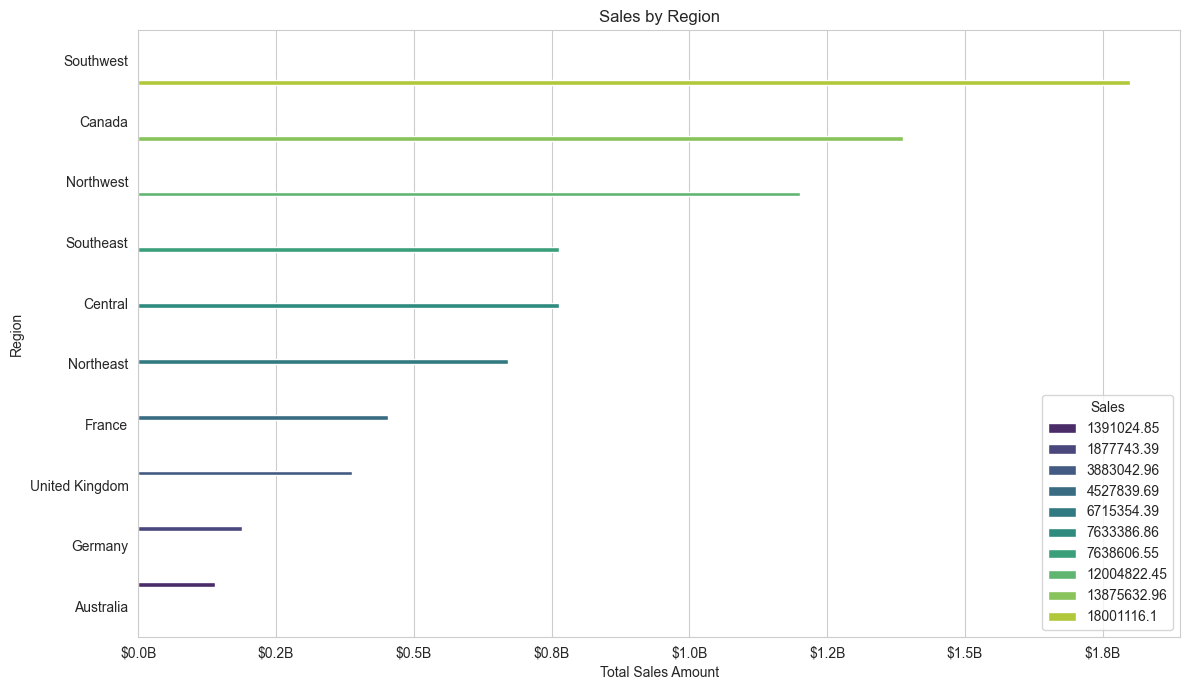

In [192]:
# Merge
merged_df_region = pd.merge(df_sales, df_region, on='SalesTerritoryKey', how='left')
# Aggregate
sales_by_region = merged_df_region.groupby('Region')['Sales'].sum().reset_index()
# Sort for visualisation purposes
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x='Sales', y='Region', hue='Sales', data=sales_by_region, palette='viridis')
plt.title('Sales by Region')
plt.xlabel('Total Sales Amount')
plt.ylabel('Region')

# Apply billions_formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.tight_layout()
plt.show()

Some regions clearly dominate in terms of sales, indicating primary markets for the company. Focusing on those regions can help maximize returns. Diversifying the company's presence across different regions can make the business more resilient to regional economic challenges.  

##### Visualise Country sales data on a map

In [193]:
countries = ['France', 'United Kingdom', 'Germany', 'Australia', 'Canada']
filtered_sales = sales_by_region[sales_by_region['Region'].isin(countries)]

fig = px.choropleth(filtered_sales, locations='Region', locationmode='country names', color='Sales',
                    hover_name='Region', color_continuous_scale=px.colors.sequential.Viridis,
                    title='Sales by Country')
fig.update_layout(height=800)
fig.show()

#### Reseller Analysis
Identifying which resellers contribute the most to sales.  
Given our objective I use an inner join to ensure the data is considering only the matched resellers.  

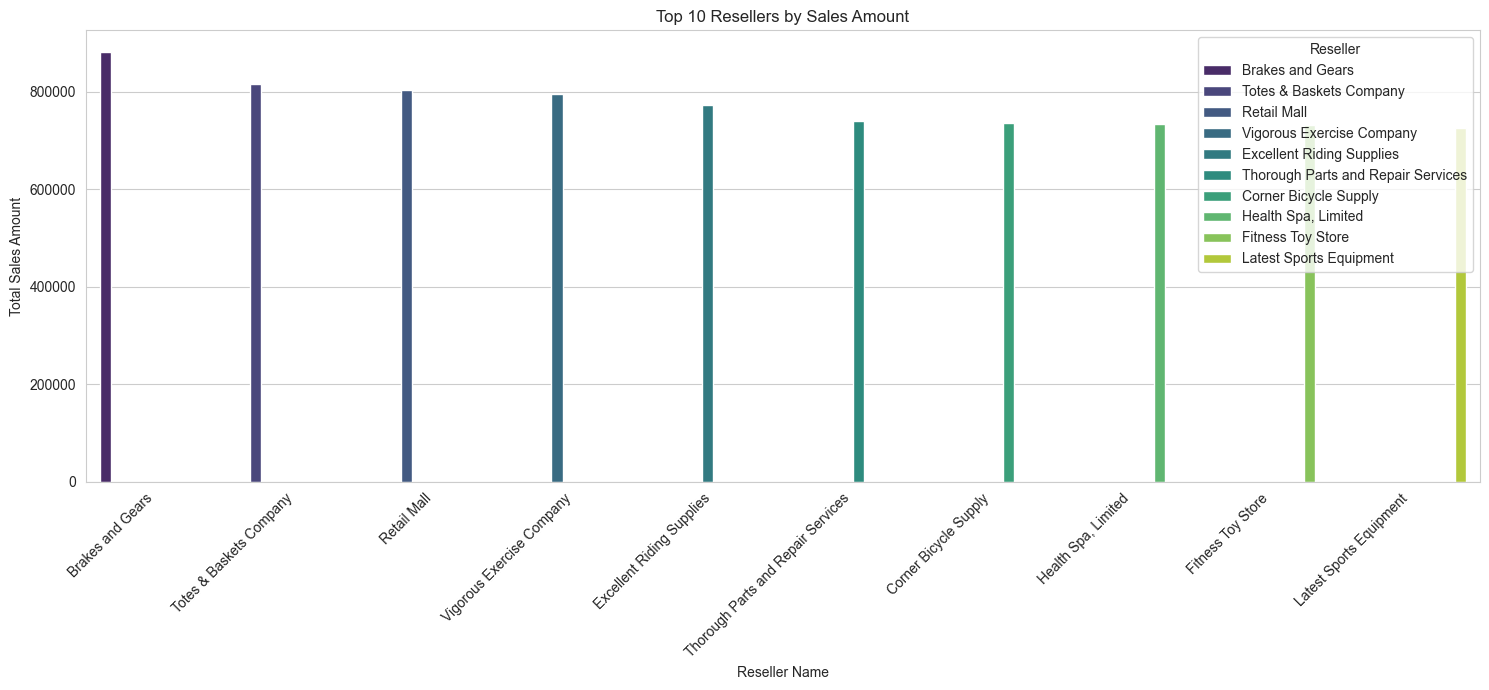

In [194]:
# Merge sales with reseller
merged_reseller_df = pd.merge(df_sales, df_reseller, on='ResellerKey', how='inner')

# Group by reseller name and aggregate sales
sales_by_reseller = merged_reseller_df.groupby('Reseller')['Sales'].sum().reset_index()

# Sort by sales for visualization purposes
sales_by_reseller = sales_by_reseller.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(data=sales_by_reseller.head(10), x='Reseller', y='Sales', hue='Reseller', palette='viridis')
plt.title('Top 10 Resellers by Sales Amount')
plt.ylabel('Total Sales Amount')
plt.xlabel('Reseller Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Brakes and Gears, Totes & Baskets Company, Retail Mail, have noticeably higher sales amounts compared to others. 

#### Salespeople Performance

In [195]:
# Merge
merged_df_sp = pd.merge(df_sales, df_salesperson, on='EmployeeKey', how='left')
# Aggregate
sales_by_salesperson = merged_df_sp.groupby('Salesperson')['Sales'].sum().reset_index()
# Sort for visualisation purposes
sales_by_salesperson = sales_by_salesperson.sort_values(by='Sales', ascending=False)

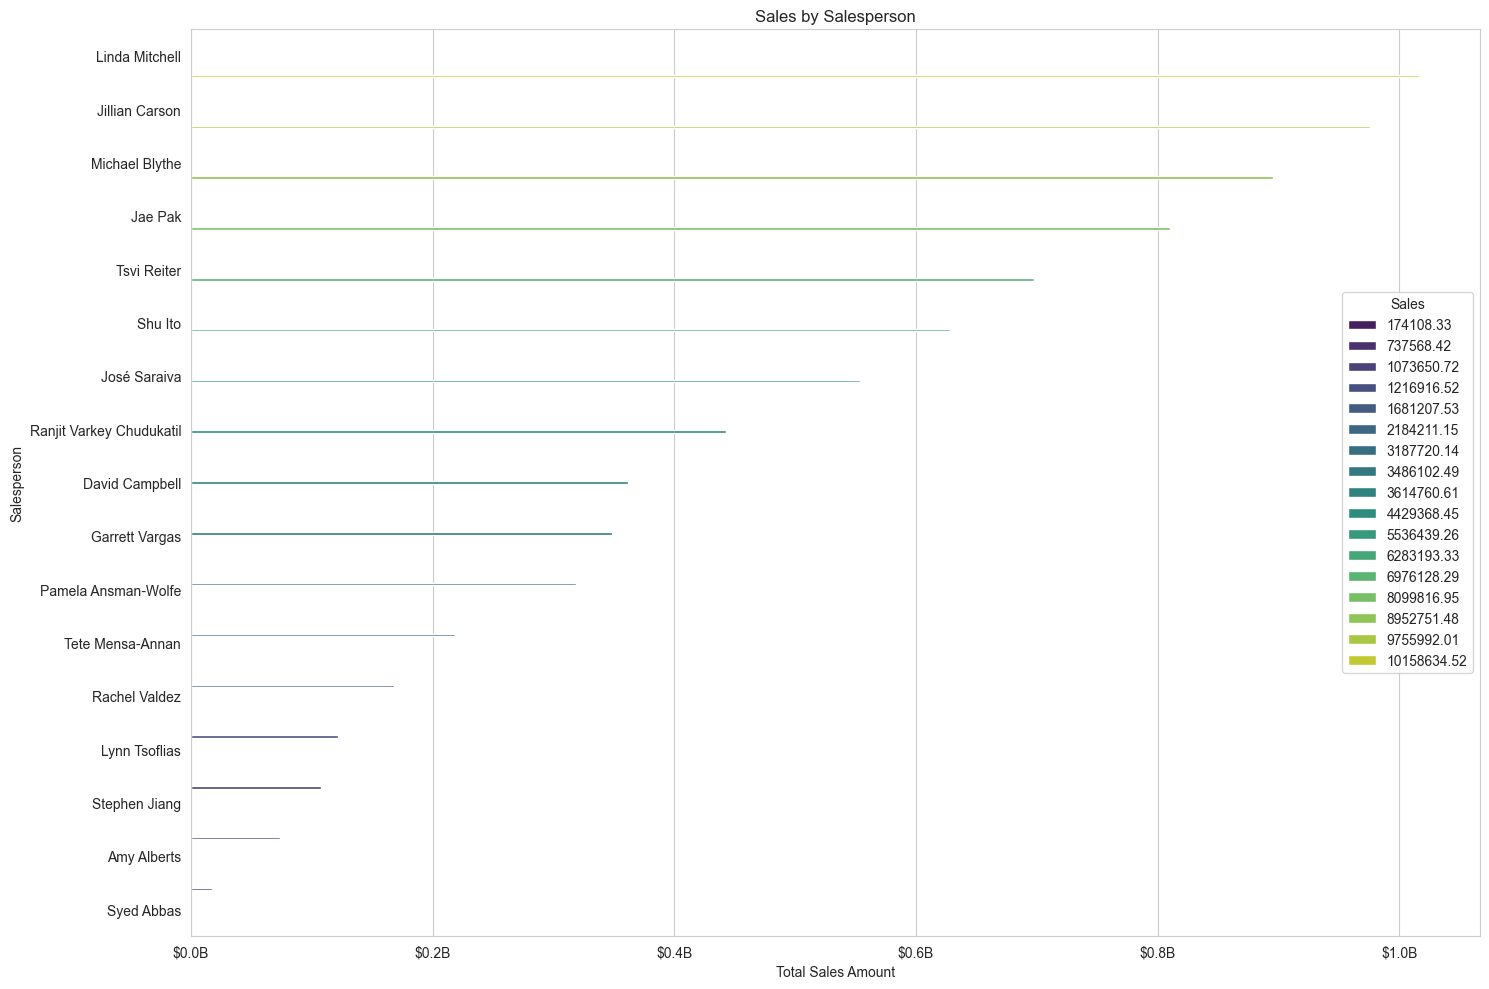

In [196]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Sales', y='Salesperson', hue='Sales', data=sales_by_salesperson, palette='viridis')
plt.title('Sales by Salesperson')
plt.xlabel('Total Sales Amount')
plt.ylabel('Salesperson')

# Apply billions_formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(billions_formatter))

plt.tight_layout()
plt.show()

By analyzing this plot, AdventureWorks management can recognize the top contributors to the company's revenue and potentially derive insights or action points related to sales strategy, training, or incentives.  

#### Targets vs. Actual Sales for Salespeople

In [197]:
# Aggregate total sales by salesperson
sales_totals = merged_df_sp.groupby(['EmployeeID', 'Salesperson'])['Sales'].sum().reset_index()

# Merge with targets
sales_with_targets = pd.merge(sales_totals, df_targets, on='EmployeeID', how='left')

In [198]:
# Get variance
sales_with_targets['Variance'] = sales_with_targets['Sales'] - sales_with_targets['Target']

In [199]:
sales_with_targets

,EmployeeID,Salesperson,Sales,Target,TargetMonth,Variance
0,61161660,Pamela Ansman-Wolfe,3187720.14,500000.0,2018-02-01,2687720.14
1,61161660,Pamela Ansman-Wolfe,3187720.14,500000.0,2019-03-01,2687720.14
2,61161660,Pamela Ansman-Wolfe,3187720.14,200000.0,2017-07-01,2987720.14
3,61161660,Pamela Ansman-Wolfe,3187720.14,200000.0,2018-01-01,2987720.14
4,61161660,Pamela Ansman-Wolfe,3187720.14,200000.0,2018-04-01,2987720.14
...,...,...,...,...,...,...
750,987554265,David Campbell,3614760.61,350000.0,2020-02-01,3264760.61
751,987554265,David Campbell,3614760.61,450000.0,2020-03-01,3164760.61
752,987554265,David Campbell,3614760.61,400000.0,2020-04-01,3214760.61
753,987554265,David Campbell,3614760.61,600000.0,2020-06-01,3014760.61


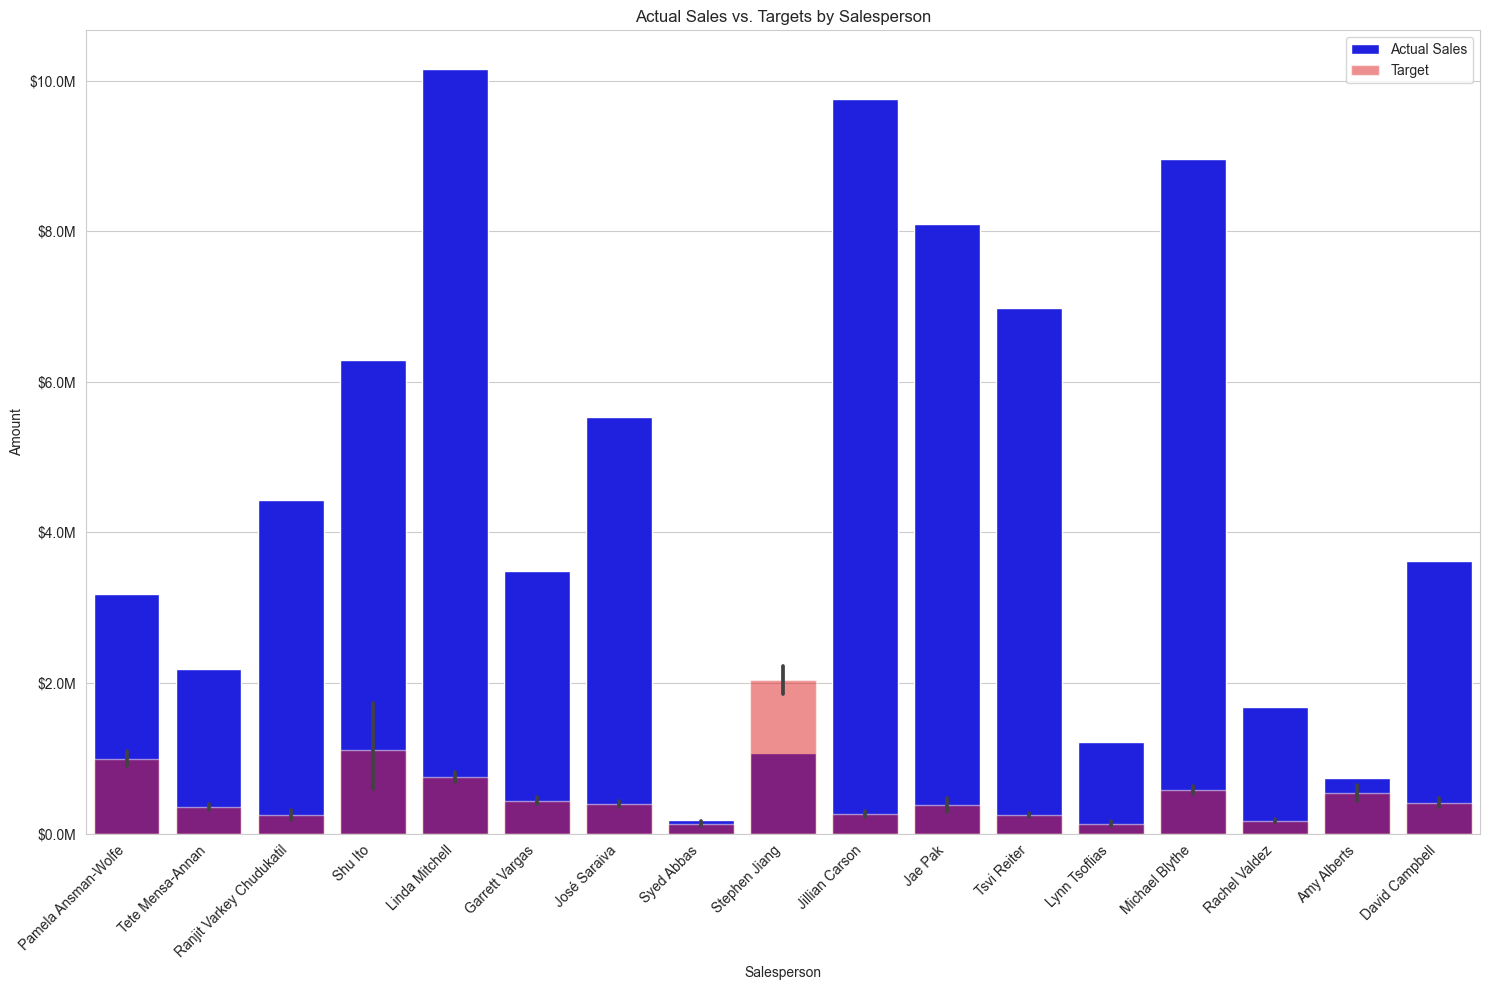

In [200]:
plt.figure(figsize=(15, 10))

# Plotting the actual sales
sns.barplot(x='Salesperson', y='Sales', data=sales_with_targets, color='blue', label='Actual Sales')

# Plotting the targets
sns.barplot(x='Salesperson', y='Target', data=sales_with_targets, color='red', alpha=0.5, label='Target')

plt.title('Actual Sales vs. Targets by Salesperson')
plt.ylabel('Amount')
plt.xlabel('Salesperson')
plt.legend()
plt.xticks(rotation=45, ha='right')

# Apply millions_formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

The blue bars represent the actual sales, while the red bars represent the target sales for each salesperson.  
Most salespeople have not met their sales targets. 
A few salespeople, such as those on the left side of the chart, have exceeded their sales targets, indicating strong performance.  

In [201]:
# Determine the number of times targets were met or exceeded
met_or_exceeded_targets = (sales_with_targets['Variance'] >= 0).sum()

# Calculate the percentage of times targets were met or exceeded
percentage_met_or_exceeded = (met_or_exceeded_targets / len(sales_with_targets)) * 100

percentage_met_or_exceeded

90.72847682119205

#### Color Popularity  
Analyze which product colors are the most popular based on sales or quantities.

In [202]:
# Merging the product and sales datasets
# An inner merge ensures that the analysis is based on sales records with known product color. 
# If there were sales records without corresponding product details, they wouldn't contribute to the color analysis anyway, since we wouldn't know their colors.
merged_df_sp_inner = df_sales.merge(df_product, on='ProductKey', how='inner')

# Merging the previously merged dataset (product and sales) with the region dataset
merged_with_region_df = merged_df_sp_inner.merge(dataframes['Region'], on='SalesTerritoryKey', how='inner')

In [203]:
merged_with_region_df.head()

,SalesOrderNumber,OrderDate,ProductKey,ResellerKey,EmployeeKey,SalesTerritoryKey,Quantity,Unit Price,Sales,Cost,...,Product,Standard Cost,Color,Subcategory,Category,Background Color Format,Font Color Format,Region,Country,Group
0,SO43897,2017-08-25,235,312,282,4,2,28.84,57.68,63.45,...,"Long-Sleeve Logo Jersey, XL",31.72,Multi,Jerseys,Clothing,#BC8F8F,#000000,Southwest,United States,North America
1,SO44113,2017-09-23,235,187,282,4,2,28.84,57.68,63.45,...,"Long-Sleeve Logo Jersey, XL",31.72,Multi,Jerseys,Clothing,#BC8F8F,#000000,Southwest,United States,North America
2,SO44520,2017-11-13,235,78,282,4,2,28.84,57.68,63.45,...,"Long-Sleeve Logo Jersey, XL",31.72,Multi,Jerseys,Clothing,#BC8F8F,#000000,Southwest,United States,North America
3,SO46057,2018-05-15,235,78,282,4,2,28.84,57.68,63.45,...,"Long-Sleeve Logo Jersey, XL",31.72,Multi,Jerseys,Clothing,#BC8F8F,#000000,Southwest,United States,North America
4,SO44115,2017-09-23,235,366,282,4,2,28.84,57.68,63.45,...,"Long-Sleeve Logo Jersey, XL",31.72,Multi,Jerseys,Clothing,#BC8F8F,#000000,Southwest,United States,North America


In [204]:
# Grouping by 'Color' for aggregated sales and quantities
color_analysis = merged_with_region_df.groupby('Color').agg({
    'Quantity': 'sum',
    'Sales': 'sum'
}).reset_index().sort_values(by='Sales', ascending=False)

color_analysis

,Color,Quantity,Sales
0,Black,69753,28616385.26
4,Silver,20166,14234724.96
3,Red,24010,13843812.11
8,Yellow,25707,12939993.91
1,Blue,17985,6598958.15
6,Unknown,18068,625639.54
2,Multi,20510,531946.84
5,Silver/Black,3564,133777.98
7,White,4351,23331.45


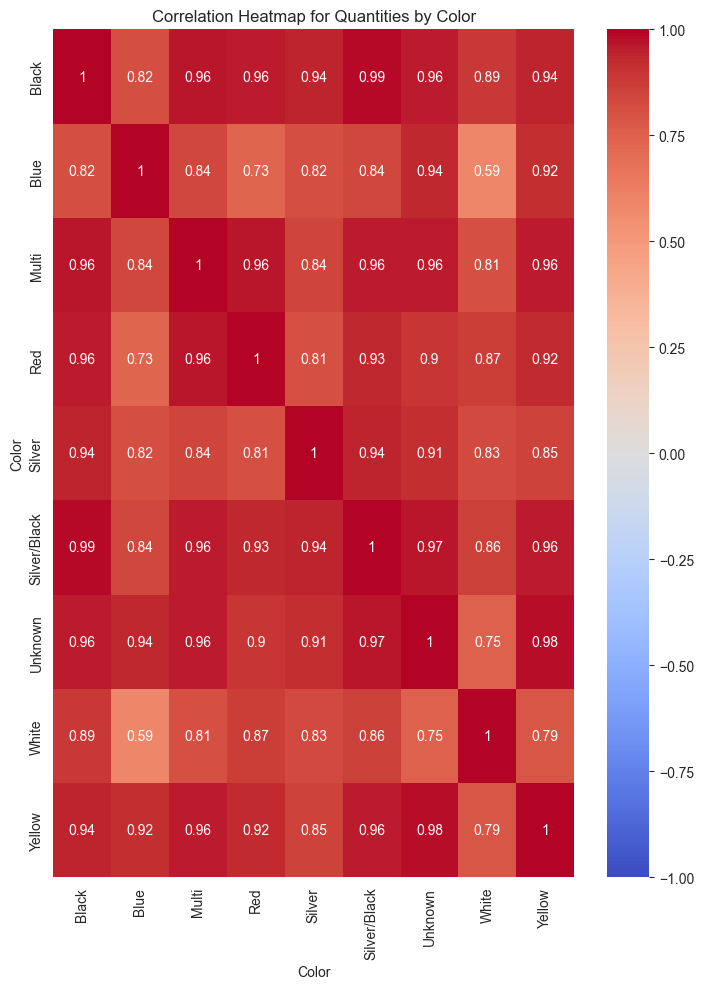

In [205]:
# Grouping by 'Region' and 'Color' for aggregated sales and quantities
grouped_by_region_color = merged_with_region_df.groupby(['Region', 'Color']).agg({
    'Quantity': 'sum',
    'Sales': 'sum'
}).reset_index()

# Creating pivot tables for visualization and correlation analysis
pivot_sales_region = grouped_by_region_color.pivot(index='Region', columns='Color', values='Sales')
pivot_quantity_region = grouped_by_region_color.pivot(index='Region', columns='Color', values='Quantity')

# Calculating correlation matrices
correlation_sales_region = pivot_sales_region.corr()
correlation_quantity_region = pivot_quantity_region.corr()

# Plotting the correlation heatmaps
plt.figure(figsize=(14, 10))

# Heatmap for Quantity correlations
plt.subplot(1, 2, 1)
sns.heatmap(correlation_quantity_region, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap for Quantities by Color")

plt.tight_layout()
plt.show()

Observations:  
The diagonal represents the correlation of a color with itself.  
The correlation between Black and Multi is approximately 0.96, which is a strong positive correlation.  
The correlation between Blue and White is around 0.59, which is a moderate positive correlation.  
Most of the other correlations are also on the higher side, indicating moderate to strong positive correlations.  
Given this, there's indeed a strong positive correlation between many color pairs in terms of quantities sold across regions.   

##### Heatmap of quantities sold for each color in each region.

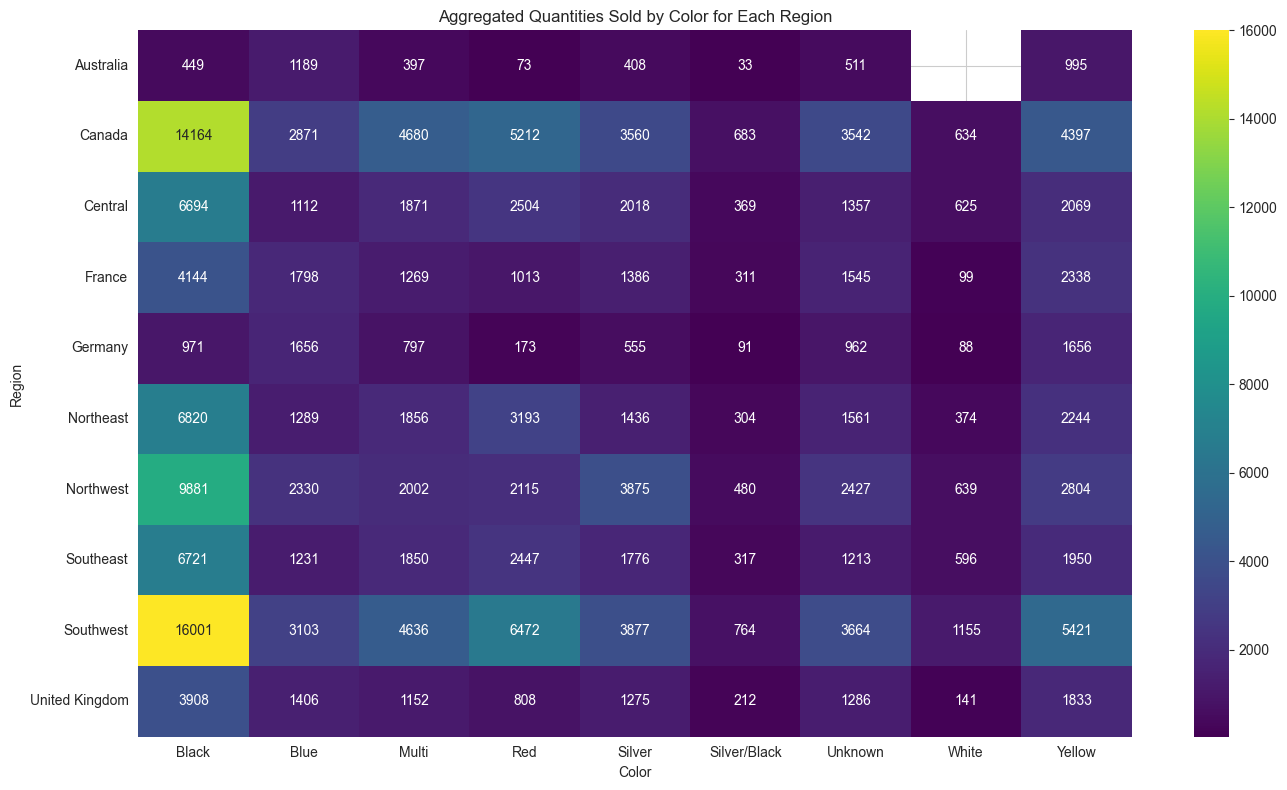

In [206]:
# Creating a pivot table for quantities sold of each color in each region
# because sns.heatmap() expects a matrix as input
pivot_quantity_by_region_color = grouped_by_region_color.pivot(index='Region', columns='Color', values='Quantity')

# pivot_quantity_by_region_color.loc['Southwest', 'Black']

plt.figure(figsize=(14, 8))

sns.heatmap(pivot_quantity_by_region_color, annot=True, cmap='viridis', fmt='.0f')
plt.title("Aggregated Quantities Sold by Color for Each Region")
plt.xlabel("Color")
plt.ylabel("Region")
plt.tight_layout()

plt.show()

Black products are popular across all regions, with significant sales in Canada, Southwest and Northwest regions.  
Multi-colored products seem to be particularly popular in the Southwest and Canada.  

* __Objective 2:__ Create a reusable and convenient way to extend and distribute the code  

The project structure provides a `requirements.txt` that includes the required modules to bootstrap this project.  
Classes for performing simple data analysis, cleaning, sanitizing and data loading are included and can be potentially useful when analysing other data sets.    

# Conclusion

Throughout the course of this project, the available sales data was useful to uncover insights and trends that can drive future business decisions at AdventureWorks. Here is a summary of all findings:  

Sales Trends Over Time: Analysis of the data spanning the years 2018 to 2020 revealed an increasing trend in sales from 2018 to 2019. However, there was a noticeable decline in 2020. In terms of monthly performance, August emerged as the top-selling month in both 2018 and 2019, with sales figures of approximately 3.6 million and 4.3 million, respectively. In 2020, May recorded the highest sales, amounting to approximately 3.3 million.  

Profit Analysis: By evaluating the profit for each sale in September 2018, it was found that the product "Mountain-200 Black, 42" was the most profitable, bringing in a profit of approximately 15,032.20.  
Per region, "Southwest" emerged as the top-performing region, achieving a profit of approximately 65,160.72.  

Top-selling Products: Mountain-200 Black 38, Mountain-200 Black 42 and Road-350-W Yellow, 48 emerged as the top-selling products, indicating their popularity among the customer base.

Sales by Category and Subcategory: Road Bikes (38%), Mountain Bikes (34.2%) and Touring Bikes (12.6%) recorded the highest sales, suggesting a strong market demand in this segment.  

Sales by Region: The Southwest, Canada and Nortwest regions consistently outperformed others in terms of sales, highlighting its potential for further growth.  

Reseller Analysis: AdventureWorks collaboration with resellers Brakes and Gears, Totes and Baskets Company and Retail Mail proved to be highly beneficial, as they contributed significantly to sales. 

Salespeople Performance: Among the sales team, Linda Mitchell, Jillian Carson, Michael Blythe and Jae Pak stood out as top performers. 

Targets vs. Actual Sales for Salespeople: A comparison of targets and actual sales revealed that approximately 90.73% of the time, salespeople met or exceeded their sales targets. This showcases the effectiveness of the company's sales strategies and the performance of the sales team.  

Color Popularity: In terms of product colors, black products are popular across all regions, with significant sales in Canada, Southwest and Northwest regions. Multi-colored products seem to be particularly popular in the Southwest and Canada based on sales and quantities sold.  

### Achievements

### Limitations

Although the Sales dataset contains 57850 records, the included temporal range is limited between the years 2017 and 2020, which may not capture long-term trends. There's a concern about the geographical coverage, as not all regions or countries might be adequately represented, especially given the inclusion of regions such as "Southwest", "Northeast" and so on.  
  

### Future Work

* __Objective 1:__ Providing applicable business visualisations and insights  
Enhancing the project's applicability can be achieved by integrating advanced tools and techniques. For instance, transitioning to interactive dashboards and visualisations using platforms like Tableau or Power BI can offer stakeholders a more dynamic view of data. Libraries such as Plotly can be further explored for creating interactive plots directly within Jupyter notebooks.    
Diving into the realm of Machine Learning and Predictive Analytics can further enrich the analysis. Techniques like Time Series Forecasting can be employed to anticipate future sales or inventory needs. Additionally, unsupervised learning methods, like clustering with K-means, can segment customers or products based on various attributes, providing a more granular understanding of the market. There's also potential in developing recommendation systems that suggest products to customers based on their purchasing behavior.    
  

* __Objective 2:__ Create a reusable and convenient way to extend and distribute the code  
Automated testing would be an immediate first step to take in terms of improving both the codebase and overall project robustness and maintainability.  
Another useful addition could be to implement abstract "model predictor" or "data simulator" interfaces which could allow other data scientists to further enhance or modify the code by adding their own simulations, visualisations and machine learning models.  Automation and scalability are other avenues to explore. Tools like Apache Airflow can be used to automate data extraction, transformation, and loading processes.   
A more efficient approach to data management might involve integrating with databases such as PostgreSQL or MySQL, moving away from flat csv files. For real-time insights, technologies like Apache Kafka can be employed for data streaming and analytics.  